# Insurance_Claims_Fraud_Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("D:\Internship/Automobile_insurance_fraud.csv")

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [6]:
df.shape

(1000, 40)

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.describe().T

count          mean           std         min  \
months_as_customer           1000.0  2.039540e+02  1.151132e+02        0.00   
age                          1000.0  3.894800e+01  9.140287e+00       19.00   
policy_number                1000.0  5.462386e+05  2.570630e+05   100804.00   
policy_deductable            1000.0  1.136000e+03  6.118647e+02      500.00   
policy_annual_premium        1000.0  1.256406e+03  2.441674e+02      433.33   
umbrella_limit               1000.0  1.101000e+06  2.297407e+06 -1000000.00   
insured_zip                  1000.0  5.012145e+05  7.170161e+04   430104.00   
capital-gains                1000.0  2.512610e+04  2.787219e+04        0.00   
capital-loss                 1000.0 -2.679370e+04  2.810410e+04  -111100.00   
incident_hour_of_the_day     1000.0  1.164400e+01  6.951373e+00        0.00   
number_of_vehicles_involved  1000.0  1.839000e+00  1.018880e+00        1.00   
bodily_injuries              1000.0  9.920000e-01  8.201272e-01        0.00   
witnesses                    1000.0  1.487000e+00  1.111335e+00        0.00   
total_claim_amount           1000.0  5.276194e+04  2.640153e+04      100.00   
injury_claim                 1000.0  7.433420e+03  4.880952e+03        0.00   
property_claim               1000.0  7.399570e+03  4.824726e+03        0.00   
vehicle_claim                1000.0  3.792895e+04  1.888625e+04       70.00   
auto_year                    1000.0  2.005103e+03  6.015861e+00     1995.00   
_c39                            0.0           NaN           NaN         NaN   

                                     25%       50%         75%          max  
months_as_customer              115.7500     199.5     276.250       479.00  
age                              32.0000      38.0      44.000        64.00  
policy_number                335980.2500  533135.0  759099.750    999435.00  
policy_deductable               500.0000    1000.0    2000.000      2000.00  
policy_annual_premium          1089.6075    1257.2    1415.695      2047.59  
umbrella_limit                    0.0000       0.0       0.000  10000000.00  
insured_zip                  448404.5000  466445.5  603251.000    620962.00  
capital-gains                     0.0000       0.0   51025.000    100500.00  
capital-loss                 -51500.0000  -23250.0       0.000         0.00  
incident_hour_of_the_day          6.0000      12.0      17.000        23.00  
number_of_vehicles_involved       1.0000       1.0       3.000         4.00  
bodily_injuries                   0.0000       1.0       2.000         2.00  
witnesses                         1.0000       1.0       2.000         3.00  
total_claim_amount            41812.5000   58055.0   70592.500    114920.00  
injury_claim                   4295.0000    6775.0   11305.000     21450.00  
property_claim                 4445.0000    6750.0   10885.000     23670.00  
vehicle_claim                 30292.5000   42100.0   50822.500     79560.00  
auto_year                      2000.0000    2005.0    2010.000      2015.00  
_c39                                 NaN       NaN         NaN          NaN

In [9]:
# missing values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
df.drop('_c39',axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

<AxesSubplot:>

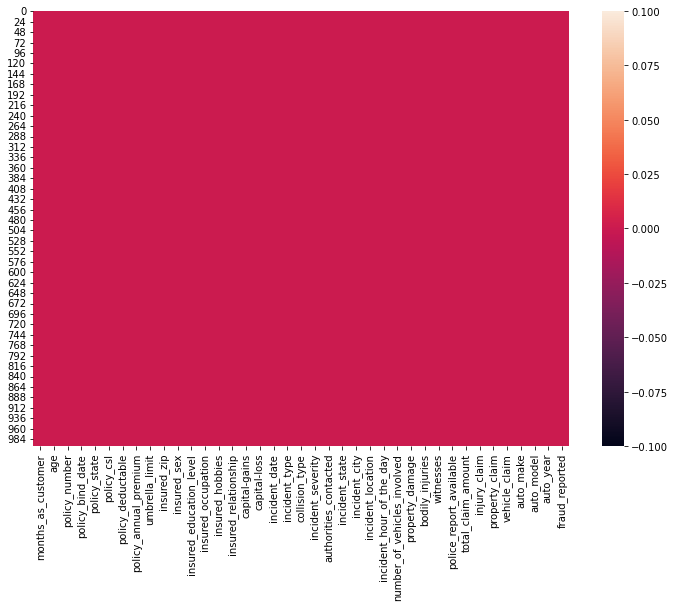

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [15]:
 
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']


In [16]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 21
Number of Continuous features: 18


([<matplotlib.patches.Wedge at 0x1f5fa972a60>,
 [Text(-0.13259044265487685, 1.0919797500487745, 'Categorical'),
  Text(0.13259054489339886, -1.0919797376347566, 'Continuous')],
 [Text(-0.07232205962993281, 0.5956253182084223, '53.8%'),
  Text(0.07232211539639936, -0.5956253114371399, '46.2%')])

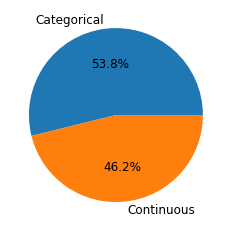

In [19]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

In [20]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# Target Variable - Fraud Detected

In [21]:
df['fraud_reported'].value_counts(dropna=False)

N    753
Y    247
Name: fraud_reported, dtype: int64

In [22]:
target_df=df['fraud_reported'].value_counts()*100/df.shape[0]
target_df

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

In [23]:
df['fraud_reported'].value_counts(normalize=True)*100

N    75.3
Y    24.7
Name: fraud_reported, dtype: float64

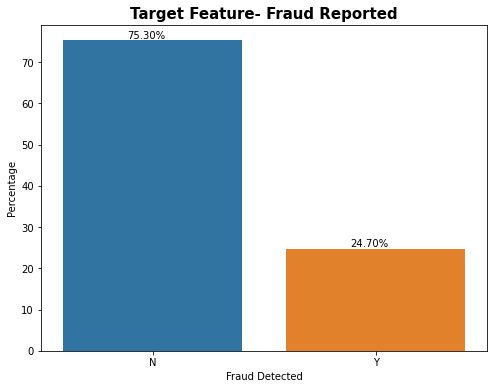

In [24]:
plt.figure(figsize=(8,6))
plt.title("Target Feature- Fraud Reported",fontdict={'fontweight':'bold','fontsize':15})
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8,height+0.5,f'{height:.2f}%')

# Age and age vs target column

<AxesSubplot:xlabel='age', ylabel='Density'>

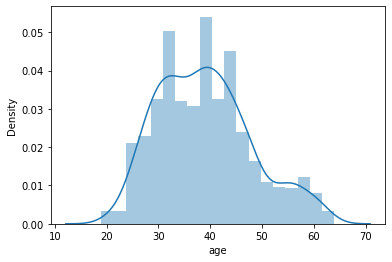

In [25]:
sns.distplot(df['age'])

Text(0, 0.5, 'Fraud Reported')

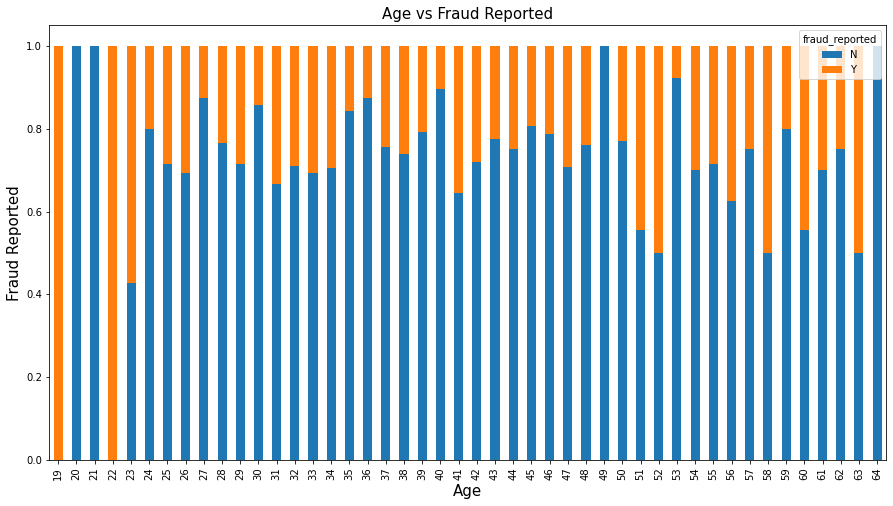

In [26]:
plt.rcParams['figure.figsize'] = [15, 8]
table=pd.crosstab(df['age'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Age vs Fraud Reported',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

# policy_number

In [27]:
df['policy_number'].nunique()

1000

# policy_bind_date

In [28]:
df['policy_bind_date'].nunique()

951

In [29]:
df['policy_bind_date'].value_counts(dropna=False)

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

# policy_state


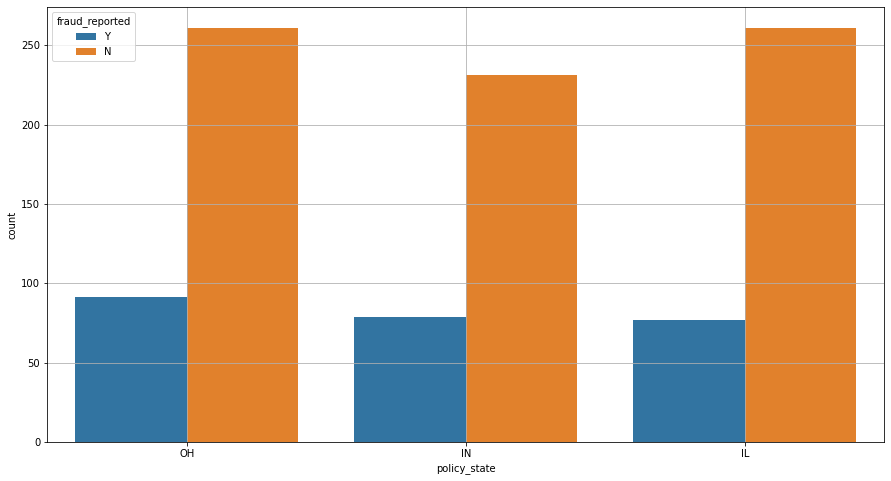

In [30]:
sns.countplot(df['policy_state'],hue=df['fraud_reported'])
plt.grid()


Text(0, 0.5, 'Fraud Reported')

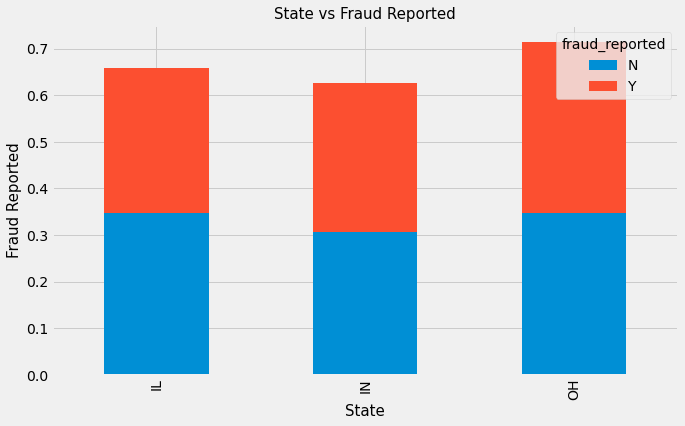

In [31]:
plt.rcParams['figure.figsize']=[10,6]
plt.style.use('fivethirtyeight')   #538
table=pd.crosstab(df['policy_state'],df['fraud_reported'])
table.div(table.sum(0),axis=1).plot(kind='bar',stacked=True)
plt.title('State vs Fraud Reported',fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)

# incident_state vs Tar4get variable

In [32]:
df['incident_state'].nunique()

7

<AxesSubplot:xlabel='incident_state', ylabel='count'>

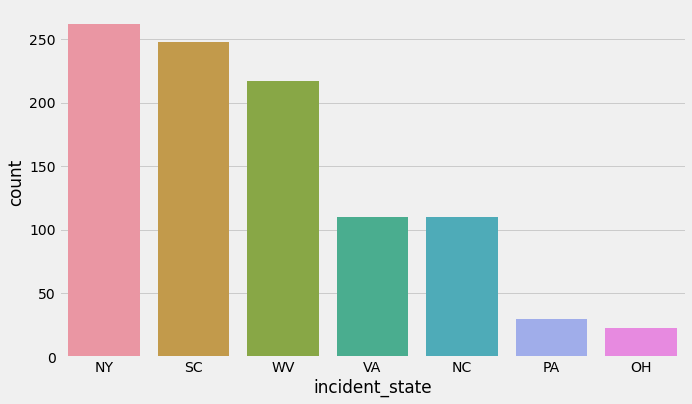

In [33]:
sns.countplot(df['incident_state'],order=df['incident_state'].value_counts().index)

In [35]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '25-01-2015'),
  Text(1, 0, '21-01-2015'),
  Text(2, 0, '22-02-2015'),
  Text(3, 0, '10-01-2015'),
  Text(4, 0, '17-02-2015'),
  Text(5, 0, '02-01-2015'),
  Text(6, 0, '13-01-2015'),
  Text(7, 0, '27-02-2015'),
  Text(8, 0, '30-01-2015'),
  Text(9, 0, '05-01-2015'),
  Text(10, 0, '06-01-2015'),
  Text(11, 0, '15-02-2015'),
  Text(12, 0, '22-01-2015'),
  Text(13, 0, '08-01-2015'),
  Text(14, 0, '15-01-2015'),
  Text(15, 0, '29-01-2015'),
  Text(16, 0, '19-01-2015'),
  Text(17, 0, '01-01-2015'),
  Text(18, 0, '10-02-2015'),
  Text(19, 0, '11-01-2015'),
  Text(20, 0, '24-02-2015'),
  Text(21, 0, '09-01-2015'),
  Text(22, 0, '28-01-2015'),
  Text(23, 0, '07-01-2015'),
  Text(24, 0, '18-01-2015'),
  Text(25, 

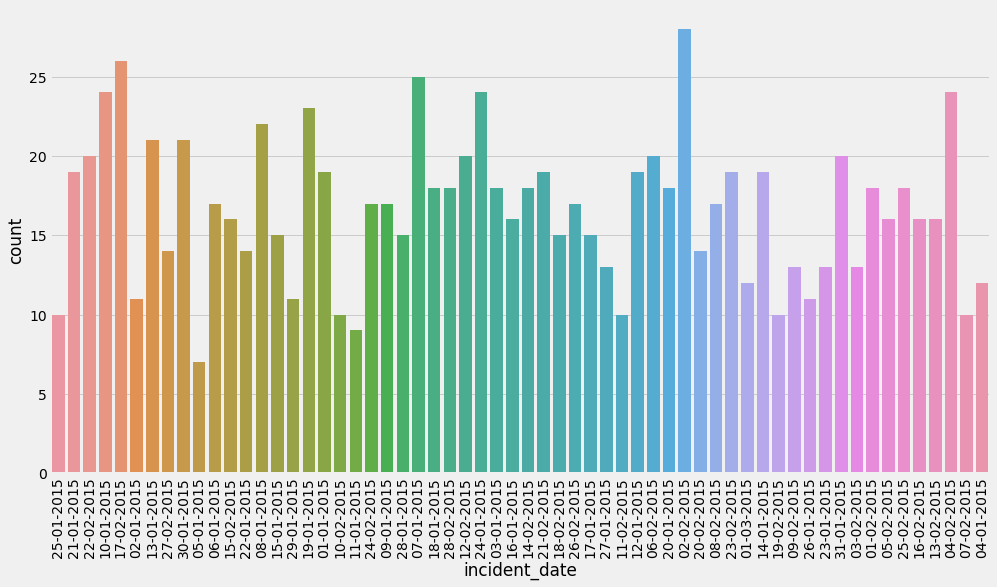

In [36]:
plt.figure(figsize=(15,8))
sns.countplot(df['incident_date'])
plt.xticks(rotation = 90)

incident_type vs fraud

In [37]:
df['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

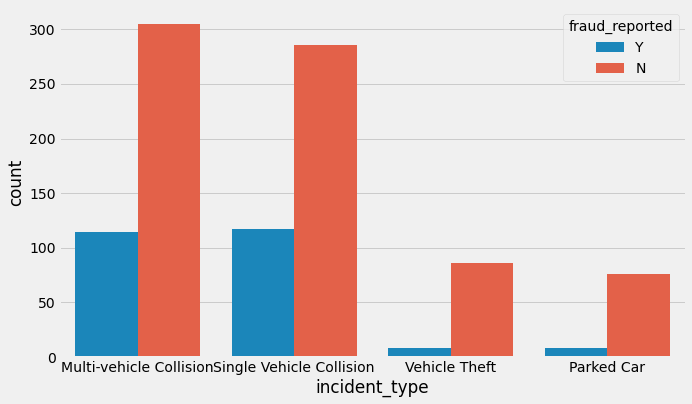

In [38]:
sns.countplot(df['incident_type'], order=df['incident_type'].value_counts().index,hue=df['fraud_reported'])

In [39]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

Text(0, 0.5, 'Percentage ')

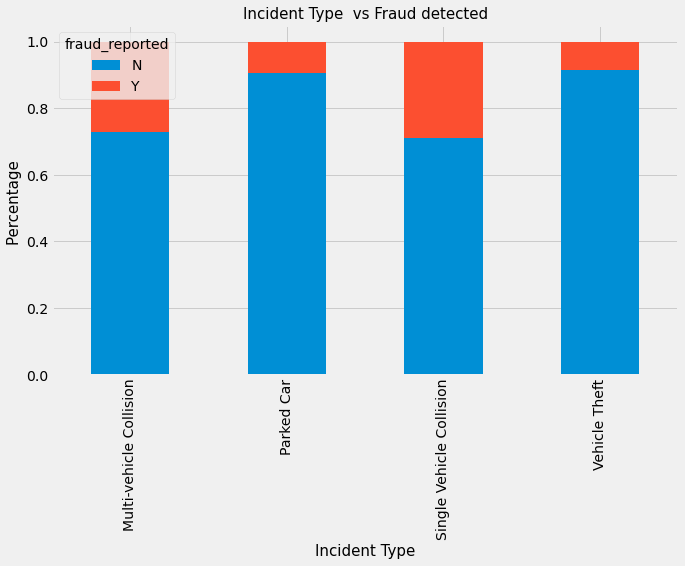

In [40]:
table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Incident Type  vs Fraud detected",fontsize=15)
plt.xlabel('Incident Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

In [41]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [42]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [43]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [45]:
df['collision_type'].value_counts(dropna=False)


Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [46]:
df['collision_type'].replace('?',np.nan,inplace=True)

In [47]:
df['collision_type'].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Text(0, 0.5, 'Percentage ')

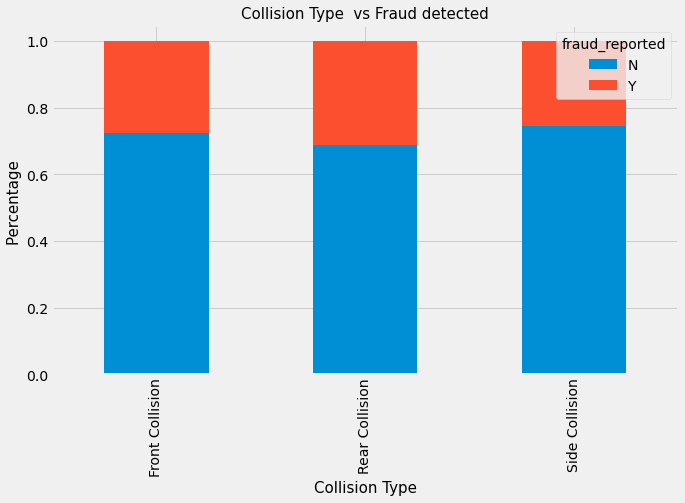

In [48]:
table=pd.crosstab(df['collision_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Collision Type  vs Fraud detected",fontsize=15)
plt.xlabel('Collision Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

In [49]:
df['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [50]:
df['incident_severity'].value_counts(normalize=True)

Minor Damage      0.354
Total Loss        0.280
Major Damage      0.276
Trivial Damage    0.090
Name: incident_severity, dtype: float64

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

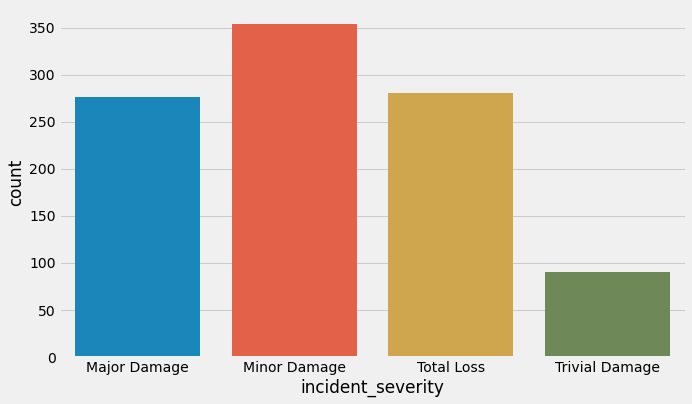

In [51]:
sns.countplot(df['incident_severity'])

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

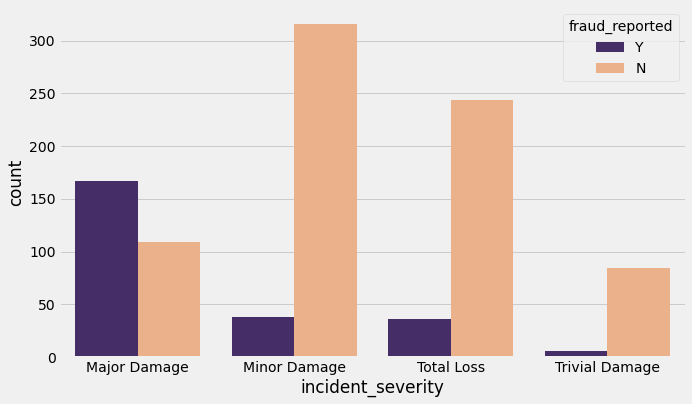

In [52]:
sns.countplot(df['incident_severity'],hue=df['fraud_reported'],palette=['#432371',"#FAAE7B"])

In [53]:
df['authorities_contacted'].unique()


array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

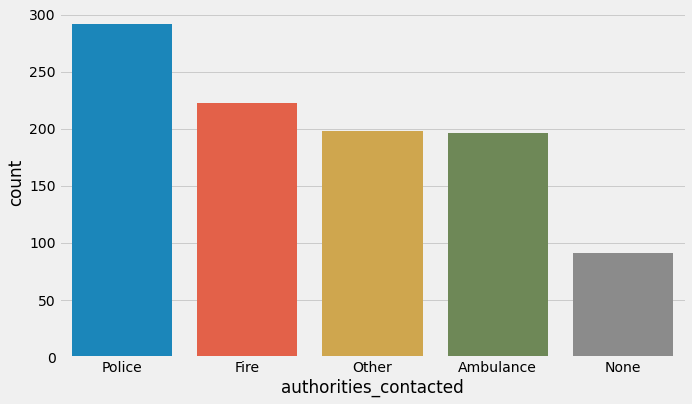

In [54]:
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index)

In [57]:
df['authorities_contacted'].value_counts(normalize=True)*100

Police       29.2
Fire         22.3
Other        19.8
Ambulance    19.6
None          9.1
Name: authorities_contacted, dtype: float64

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

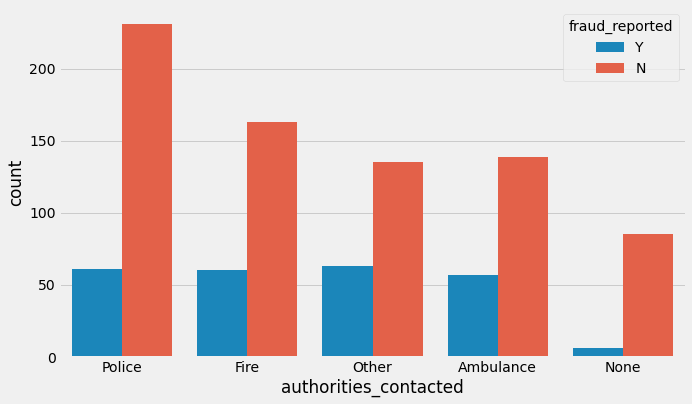

In [58]:
sns.countplot(df['authorities_contacted'], order=df['authorities_contacted'].value_counts().index, hue=df['fraud_reported'])

# number_of_vehicles_involved

In [59]:
df['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

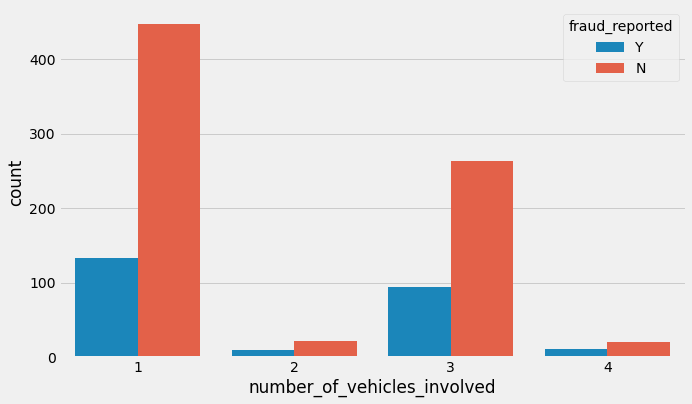

In [60]:
sns.countplot(df['number_of_vehicles_involved'], hue=df['fraud_reported'])


# property_damage

In [61]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [62]:
df['property_damage'].replace('?',np.nan, inplace=True)

In [63]:
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

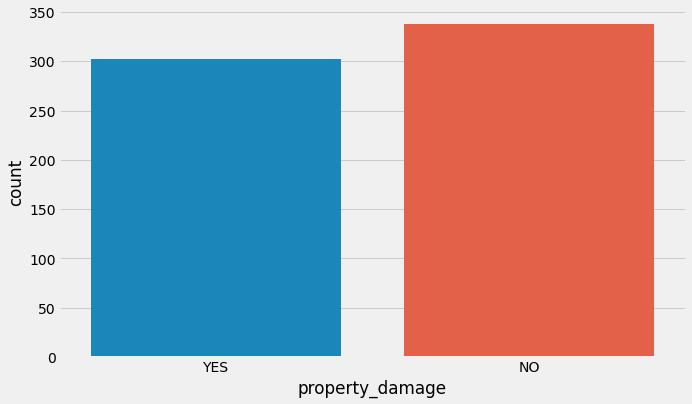

In [64]:
sns.countplot(df['property_damage'])

<AxesSubplot:xlabel='property_damage', ylabel='count'>

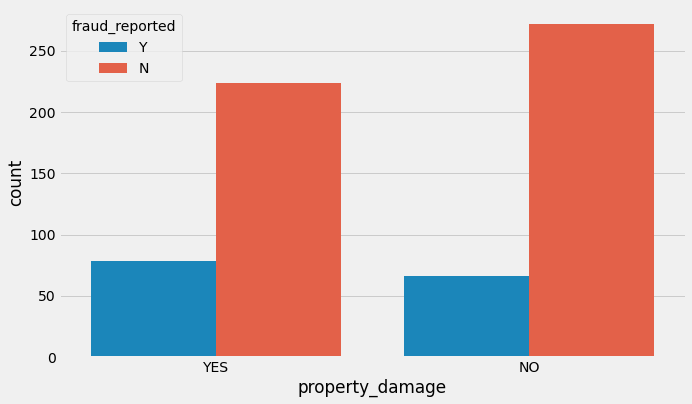

In [65]:
sns.countplot(df['property_damage'],hue=df['fraud_reported'])

In [66]:
df.groupby('property_damage')['fraud_reported'].value_counts()

property_damage  fraud_reported
NO               N                 272
                 Y                  66
YES              N                 224
                 Y                  78
Name: fraud_reported, dtype: int64

In [67]:
df.replace('?',np.nan,inplace=True)

# bodily_injuries

In [68]:
df['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

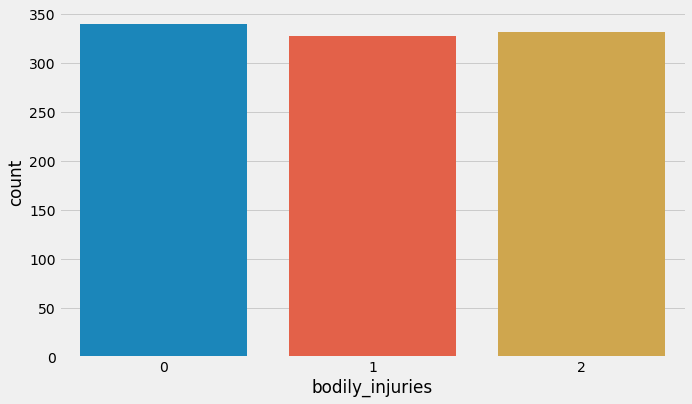

In [69]:
sns.countplot(df['bodily_injuries'])

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

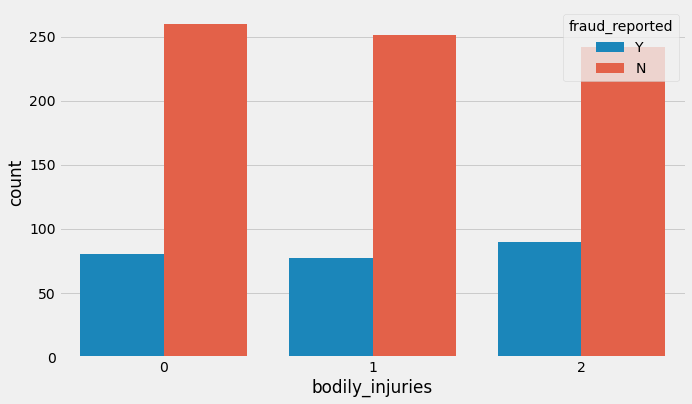

In [70]:
sns.countplot(df['bodily_injuries'],hue=df['fraud_reported'])

In [71]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [72]:
df['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

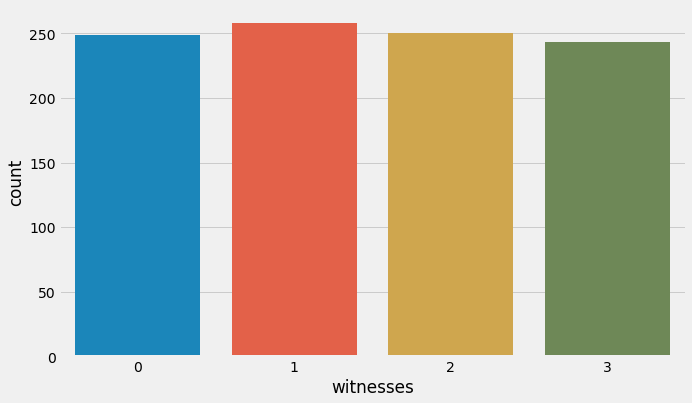

In [73]:
sns.countplot(df['witnesses'])

<AxesSubplot:xlabel='witnesses', ylabel='count'>

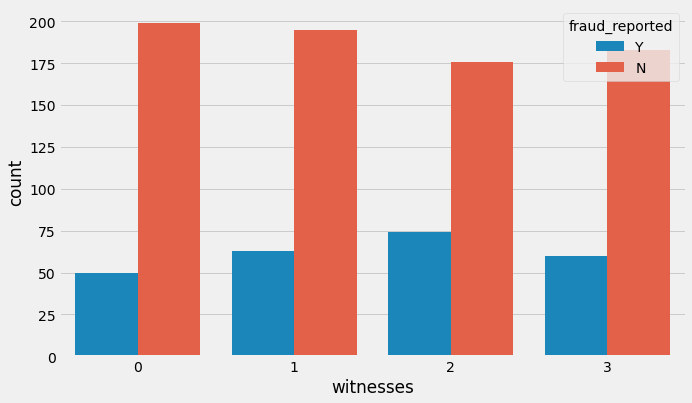

In [74]:
sns.countplot(df['witnesses'],hue=df['fraud_reported'])

# police_report_available

In [75]:
df['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

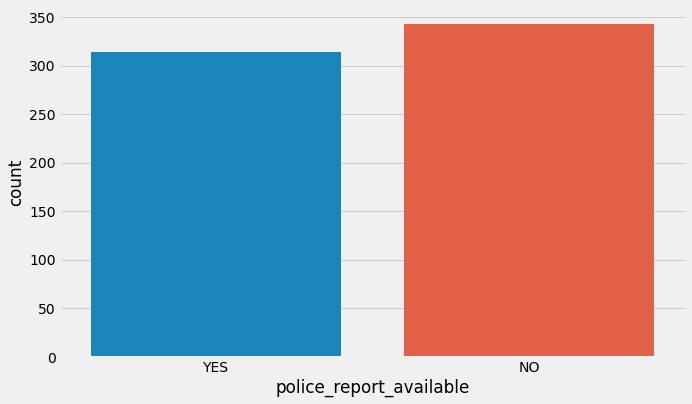

In [76]:
sns.countplot(df['police_report_available'])

# Vehicle Detail
auto_make

In [77]:
df['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Dodge'),
  Text(2, 0, 'Suburu'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Accura'),
  Text(10, 0, 'Volkswagen'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes'),
  Text(13, 0, 'Honda')])

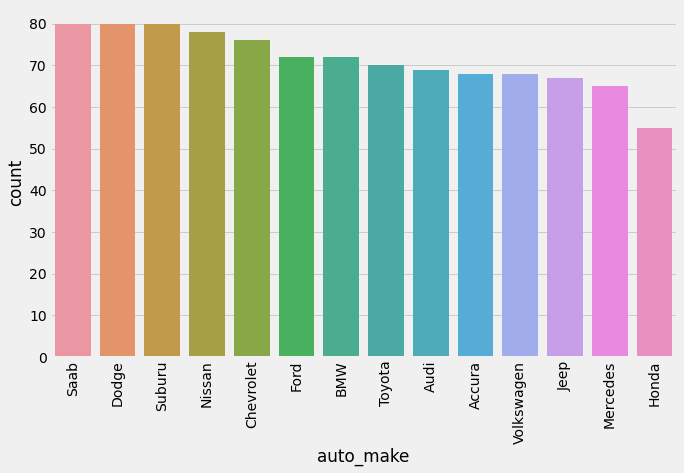

In [78]:
sns.countplot(df['auto_make'],order=df['auto_make'].value_counts().index)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Saab'),
  Text(1, 0, 'Dodge'),
  Text(2, 0, 'Suburu'),
  Text(3, 0, 'Nissan'),
  Text(4, 0, 'Chevrolet'),
  Text(5, 0, 'Ford'),
  Text(6, 0, 'BMW'),
  Text(7, 0, 'Toyota'),
  Text(8, 0, 'Audi'),
  Text(9, 0, 'Accura'),
  Text(10, 0, 'Volkswagen'),
  Text(11, 0, 'Jeep'),
  Text(12, 0, 'Mercedes'),
  Text(13, 0, 'Honda')])

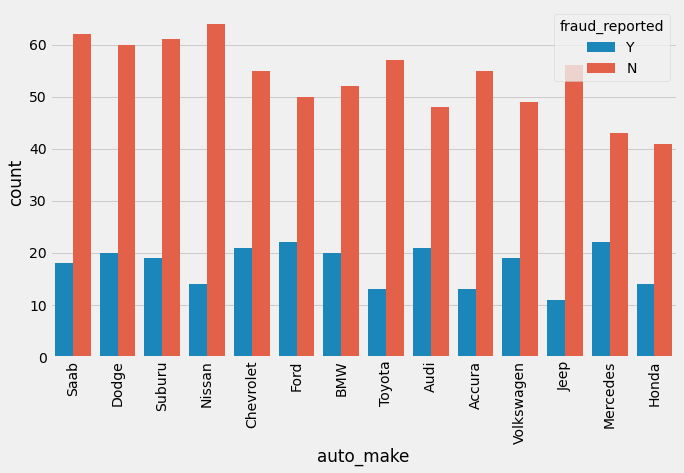

In [79]:
sns.countplot(df['auto_make'],order=df['auto_make'].value_counts().index, hue=df['fraud_reported'])
plt.xticks(rotation=90)

# auto_model

In [80]:
df['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

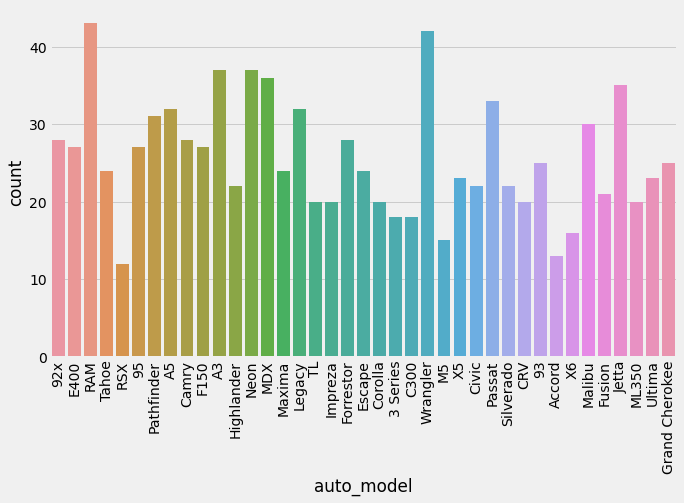

In [81]:
sns.countplot(df['auto_model'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'RAM'),
  Text(1, 0, 'Wrangler'),
  Text(2, 0, 'A3'),
  Text(3, 0, 'Neon'),
  Text(4, 0, 'MDX'),
  Text(5, 0, 'Jetta'),
  Text(6, 0, 'Passat'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Legacy'),
  Text(9, 0, 'Pathfinder'),
  Text(10, 0, 'Malibu'),
  Text(11, 0, '92x'),
  Text(12, 0, 'Camry'),
  Text(13, 0, 'Forrestor'),
  Text(14, 0, 'F150'),
  Text(15, 0, '95'),
  Text(16, 0, 'E400'),
  Text(17, 0, '93'),
  Text(18, 0, 'Grand Cherokee'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Tahoe'),
  Text(21, 0, 'Maxima'),
  Text(22, 0, 'Ultima'),
  Text(23, 0, 'X5'),
  Text(24, 0, 'Highlander'),
  Text(25, 0, 'Civic'),
  Text(26, 0, 'Silverado'),
  Text(27, 0, 'Fusion'),
  Text(28, 0, 'ML350'),
  Text(29, 0, 'Impreza'),
  Text(30, 0, 'Corolla'),
  Text(31, 0, 'TL'),
  Text(32, 0, 'CRV'),
  Text(33, 0, 'C300'),
 

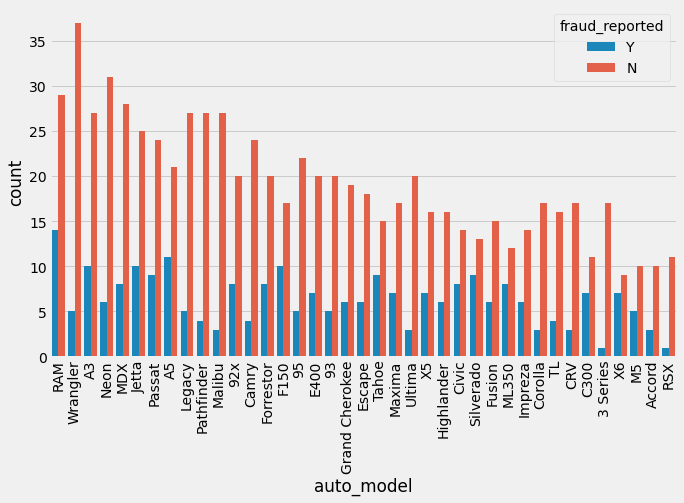

In [82]:
sns.countplot(df['auto_model'],order=df['auto_model'].value_counts().index,hue=df['fraud_reported'])
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Auto Model  vs Fraud Case')

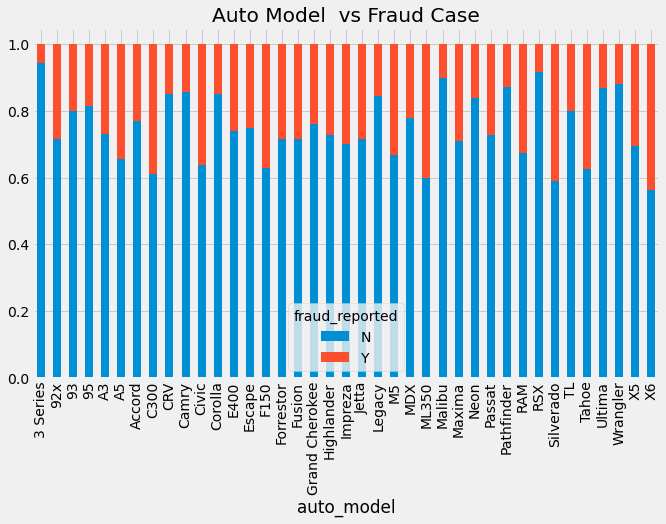

In [83]:
table=pd.crosstab(df['auto_model'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Auto Model  vs Fraud Case')

# auto_year

In [85]:
df['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

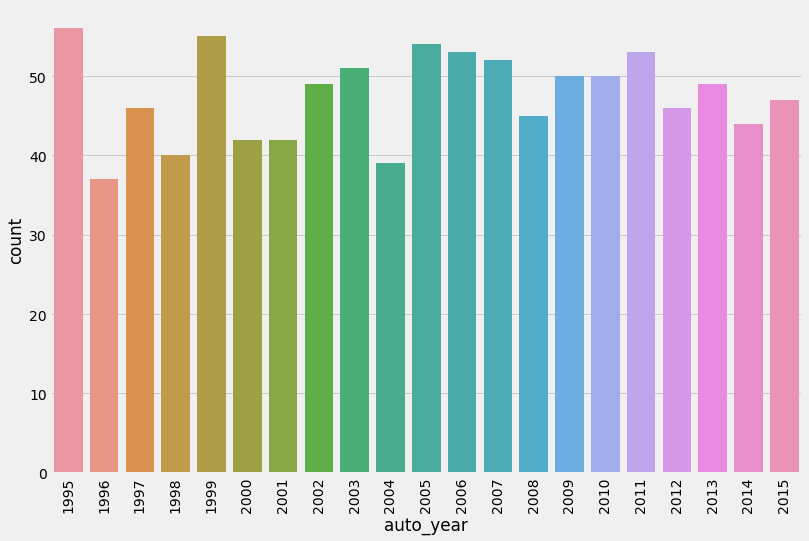

In [86]:
plt.figure(figsize=(12,8))
sns.countplot(df['auto_year'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

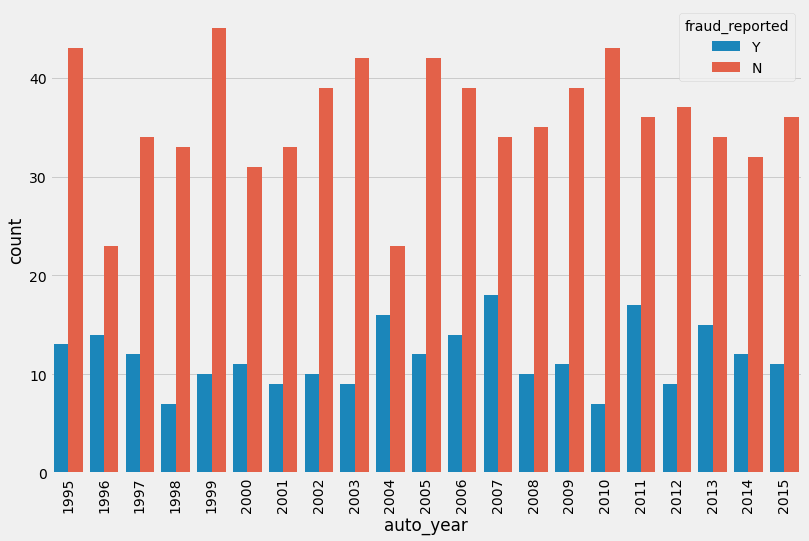

In [87]:
plt.figure(figsize=(12,8))
sns.countplot(df['auto_year'],hue=df['fraud_reported'])
plt.xticks(rotation=90)

# Insured Person Exploratory Analysis

In [88]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [89]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

([<matplotlib.patches.Wedge at 0x1f5fee27c70>,
 [Text(-0.12757508092656847, 1.0925770447554624, 'FEMALE'),
  Text(0.12757508092656858, -1.0925770447554624, 'MALE')],
 [Text(-0.06958640777812825, 0.5959511153211613, '53.70%'),
  Text(0.0695864077781283, -0.5959511153211613, '46.30%')])

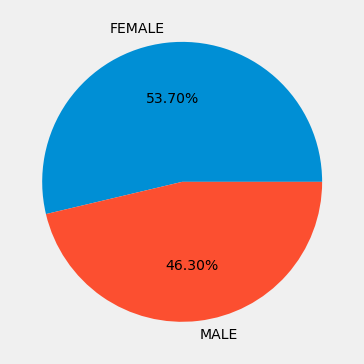

In [90]:
plt.pie(df['insured_sex'].value_counts().values,labels=df['insured_sex'].value_counts().index,autopct='%1.2f%%')

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

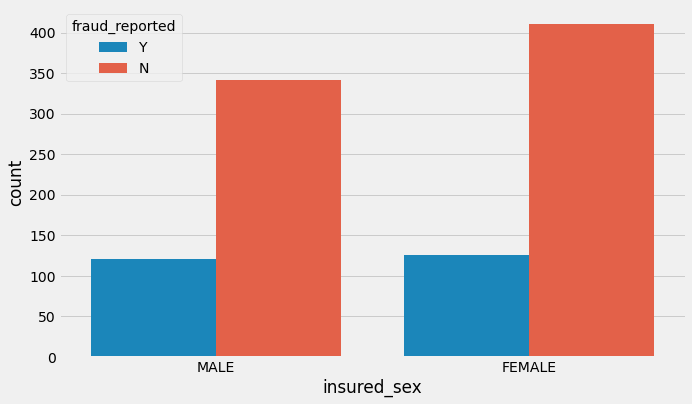

In [91]:
sns.countplot(df['insured_sex'],hue=df['fraud_reported'])

# insured_education_level

In [92]:
df['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

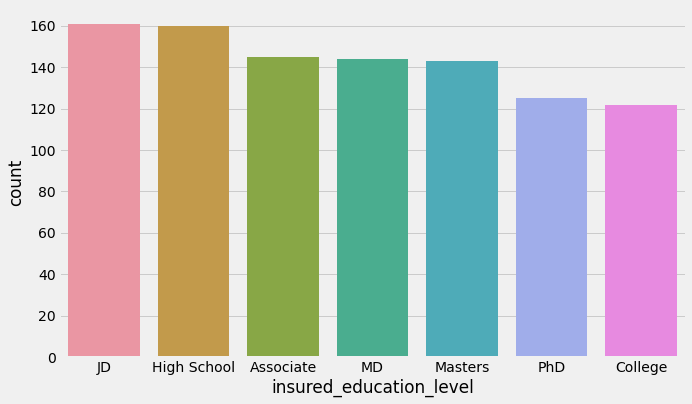

In [93]:
sns.countplot(df['insured_education_level'],order=df['insured_education_level'].value_counts().index)

<AxesSubplot:xlabel='insured_education_level'>

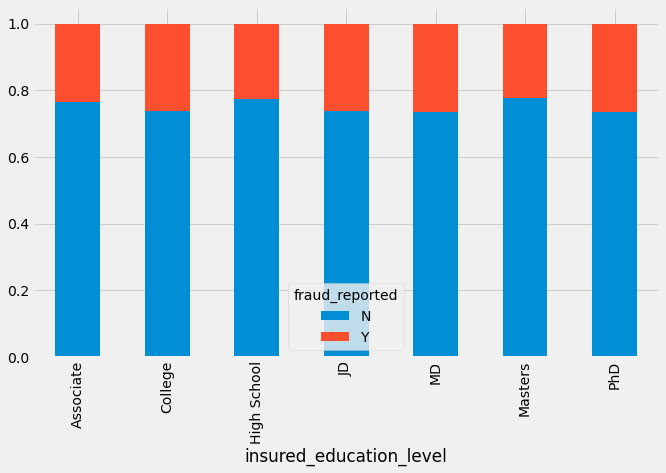

In [94]:
table=pd.crosstab(df['insured_education_level'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

In [95]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

<AxesSubplot:xlabel='insured_occupation'>

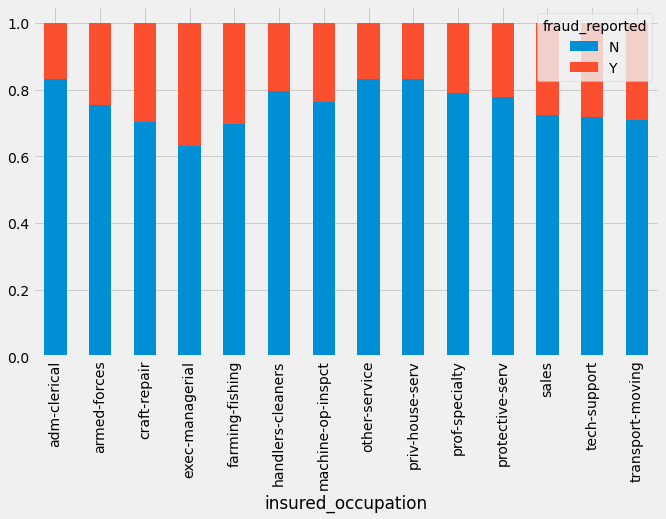

In [96]:
table=pd.crosstab(df['insured_occupation'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_hobbies

In [97]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'reading'),
  Text(1, 0, 'exercise'),
  Text(2, 0, 'paintball'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'movies'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'kayaking'),
  Text(8, 0, 'yachting'),
  Text(9, 0, 'hiking'),
  Text(10, 0, 'video-games'),
  Text(11, 0, 'skydiving'),
  Text(12, 0, 'base-jumping'),
  Text(13, 0, 'board-games'),
  Text(14, 0, 'polo'),
  Text(15, 0, 'chess'),
  Text(16, 0, 'dancing'),
  Text(17, 0, 'sleeping'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'basketball')])

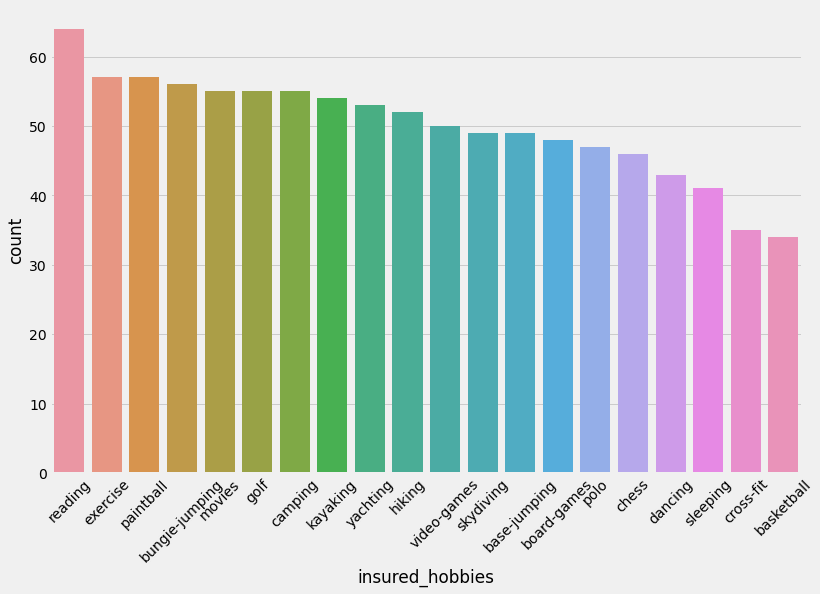

In [98]:
plt.figure(figsize=(12,8))
sns.countplot(df['insured_hobbies'],order=df['insured_hobbies'].value_counts().index)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='insured_hobbies'>

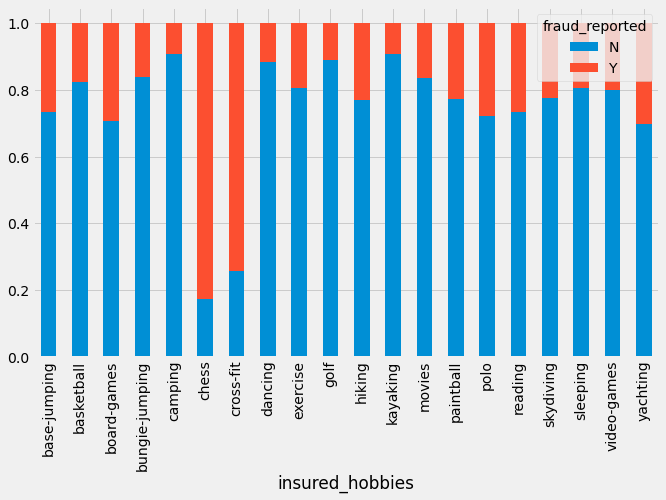

In [99]:
table=pd.crosstab(df['insured_hobbies'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

# insured_relationship


In [100]:
df['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

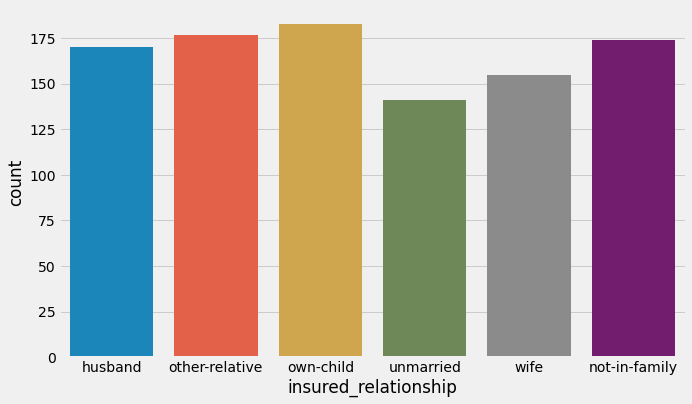

In [102]:
sns.countplot(df['insured_relationship'])

In [103]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# capital-gains

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

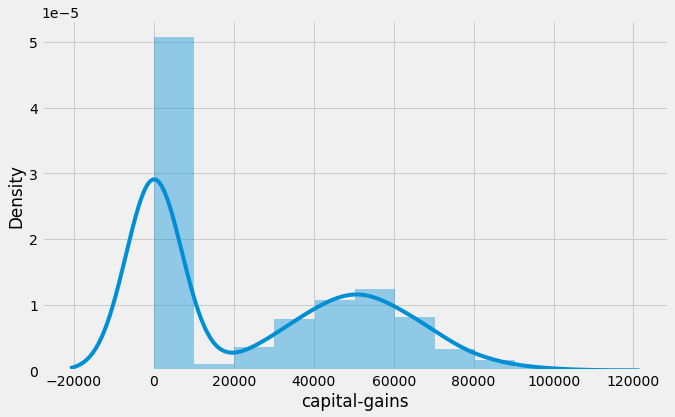

In [104]:
sns.distplot(df['capital-gains'])

In [105]:
df[cont_features]

months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  
0             13020          52080       2004  
1               780           3510       2007  
2              3850          23100       2007  
3              6340          50720       2014  
4               650           4550       2009  
..              ...            ...        ...  
995            8720          61040       2006  
996           18080          72320       2015  
997            7500          52500       1996  
998            5220          36540       1998  
999             920           3680       2007  

[100

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

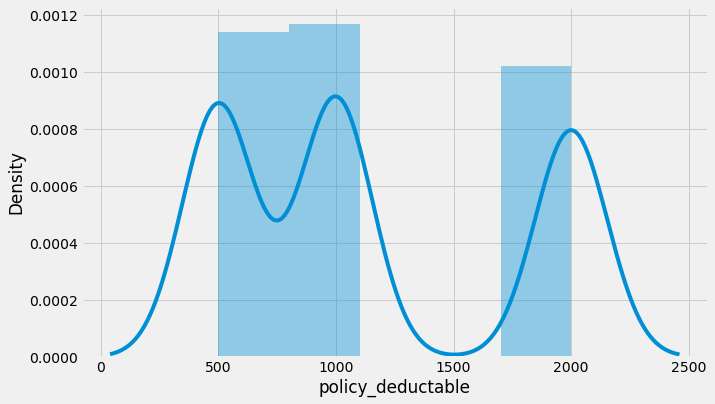

In [106]:
sns.distplot(df['policy_deductable'])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

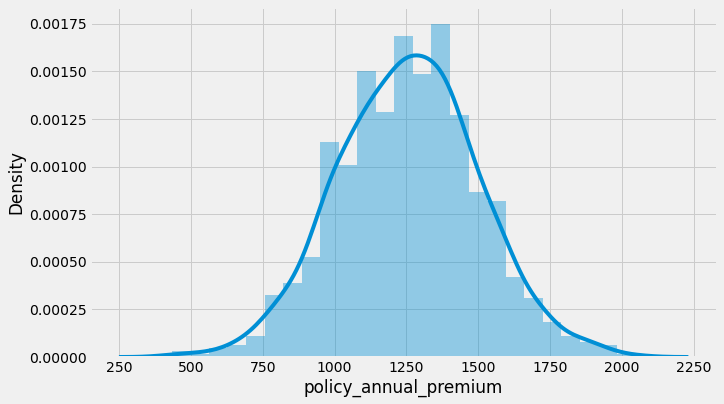

In [107]:
sns.distplot(df['policy_annual_premium'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '-1000000'),
  Text(1, 0, '0'),
  Text(2, 0, '2000000'),
  Text(3, 0, '3000000'),
  Text(4, 0, '4000000'),
  Text(5, 0, '5000000'),
  Text(6, 0, '6000000'),
  Text(7, 0, '7000000'),
  Text(8, 0, '8000000'),
  Text(9, 0, '9000000'),
  Text(10, 0, '10000000')])

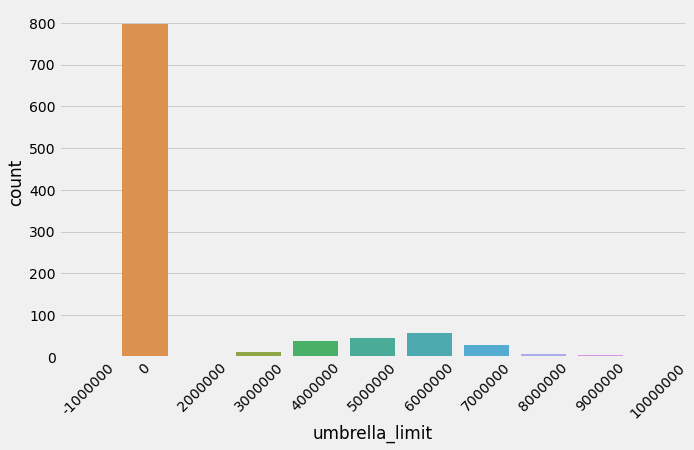

In [108]:
sns.countplot(df['umbrella_limit'])
plt.xticks(rotation=45)

In [109]:
df['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [110]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

# insured_zip

In [111]:
df['insured_zip'].value_counts()

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64

# Capital gains

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

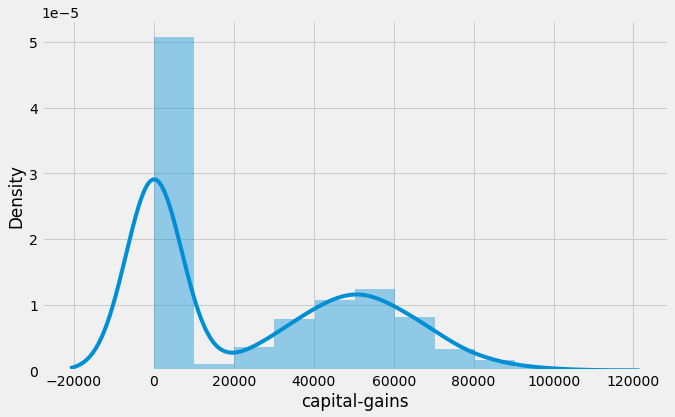

In [113]:
sns.distplot(df['capital-gains'])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

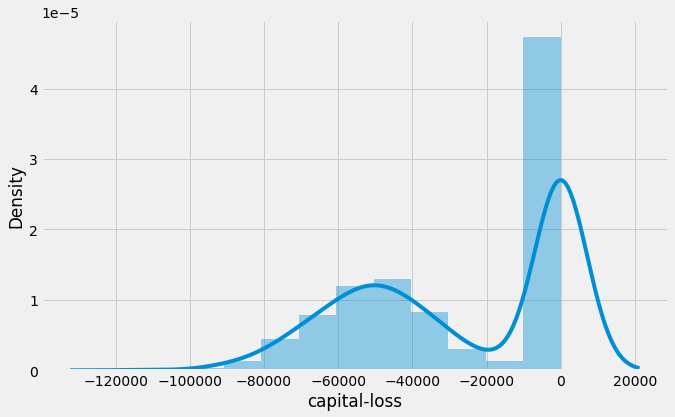

In [114]:
sns.distplot(df['capital-loss'])

In [115]:
df[cont_features]


months_as_customer  age  policy_number  policy_deductable  \
0                   328   48         521585               1000   
1                   228   42         342868               2000   
2                   134   29         687698               2000   
3                   256   41         227811               2000   
4                   228   44         367455               1000   
..                  ...  ...            ...                ...   
995                   3   38         941851               1000   
996                 285   41         186934               1000   
997                 130   34         918516                500   
998                 458   62         533940               2000   
999                 456   60         556080               1000   

     policy_annual_premium  umbrella_limit  insured_zip  capital-gains  \
0                  1406.91               0       466132          53300   
1                  1197.22         5000000       468176              0   
2                  1413.14         5000000       430632          35100   
3                  1415.74         6000000       608117          48900   
4                  1583.91         6000000       610706          66000   
..                     ...             ...          ...            ...   
995                1310.80               0       431289              0   
996                1436.79               0       608177          70900   
997                1383.49         3000000       442797          35100   
998                1356.92         5000000       441714              0   
999                 766.19               0       612260              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0               0                         5                            1   
1               0                         8                            1   
2               0                         7                            3   
3          -62400                         5                            1   
4          -46000                        20                            1   
..            ...                       ...                          ...   
995             0                        20                            1   
996             0                        23                            1   
997             0                         4                            3   
998             0                         2                            1   
999             0                         6                            1   

     bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                  1          2               71610          6510   
1                  0          0                5070           780   
2                  2          3               34650          7700   
3                  1          2               63400          6340   
4                  0          1                6500          1300   
..               ...        ...                 ...           ...   
995                0          1               87200         17440   
996                2          3              108480         18080   
997                2          3               67500          7500   
998                0          1               46980          5220   
999                0          3                5060           460   

     property_claim  vehicle_claim  auto_year  
0             13020          52080       2004  
1               780           3510       2007  
2              3850          23100       2007  
3              6340          50720       2014  
4               650           4550       2009  
..              ...            ...        ...  
995            8720          61040       2006  
996           18080          72320       2015  
997            7500          52500       1996  
998            5220          36540       1998  
999             920           3680       2007  

[100

Text(0.5, 0, 'AGE')

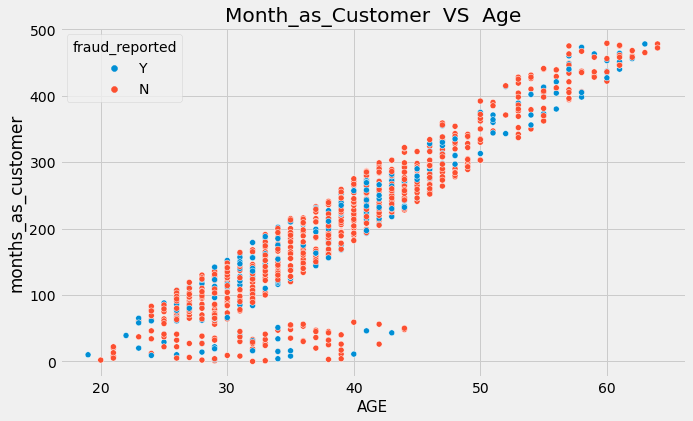

In [116]:
sns.scatterplot('age','months_as_customer',hue='fraud_reported',data=df)
plt.title('Month_as_Customer  VS  Age')
plt.xlabel('AGE',fontsize=15)

Text(0.5, 0, 'policy_deductable')

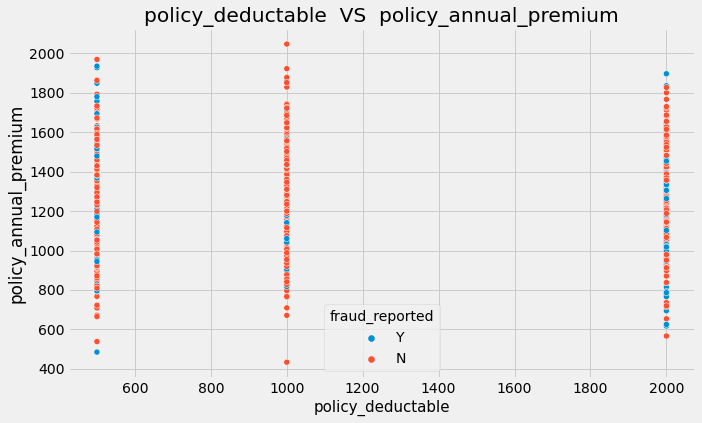

In [117]:
sns.scatterplot('policy_deductable','policy_annual_premium',hue='fraud_reported',data=df)
plt.title('policy_deductable  VS  policy_annual_premium')
plt.xlabel('policy_deductable',fontsize=15)

Text(0.5, 0, 'capital-loss')

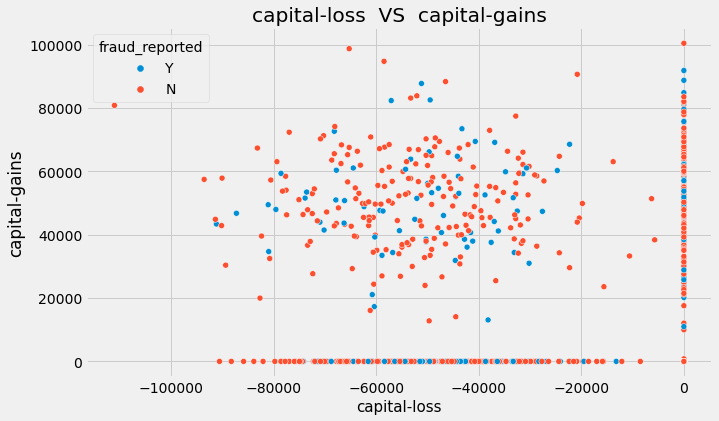

In [118]:
sns.scatterplot('capital-loss','capital-gains',hue='fraud_reported',data=df)
plt.title('capital-loss  VS  capital-gains')
plt.xlabel('capital-loss',fontsize=15)

In [119]:
df['capital-gains'].mean() , df['capital-loss'].mean()

(25126.1, -26793.7)

<AxesSubplot:xlabel='injury_claim', ylabel='total_claim_amount'>

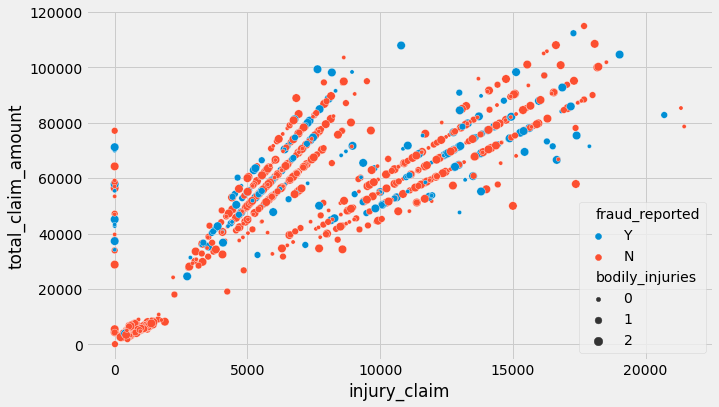

In [120]:
sns.scatterplot('injury_claim','total_claim_amount',hue='fraud_reported',size='bodily_injuries',data=df)

<AxesSubplot:xlabel='property_claim', ylabel='total_claim_amount'>

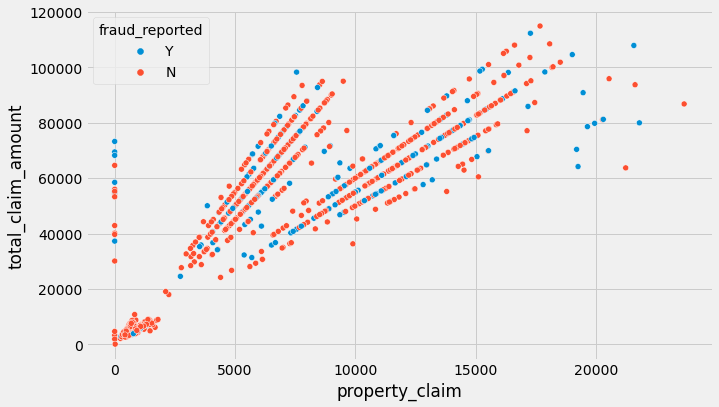

In [121]:
sns.scatterplot('property_claim','total_claim_amount',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='vehicle_claim', ylabel='total_claim_amount'>

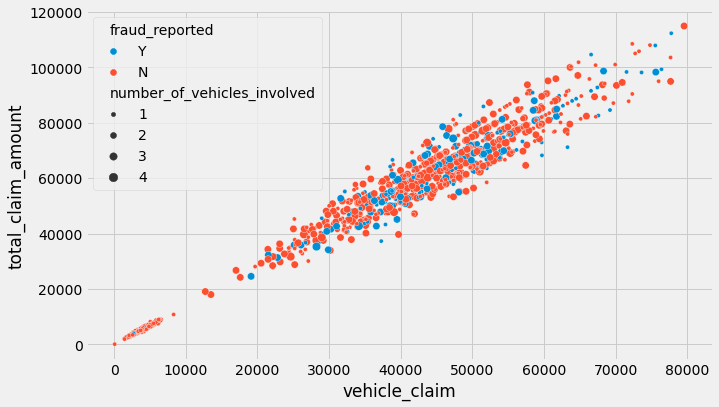

In [122]:
sns.scatterplot('vehicle_claim','total_claim_amount',hue='fraud_reported',size='number_of_vehicles_involved',data=df)

# Distribution of Numerical features

In [124]:
import random

color_=['#000057','#005757','#005700','#ad7100','#008080','#575757','#003153']
cmap_=['magma','copper','crest']

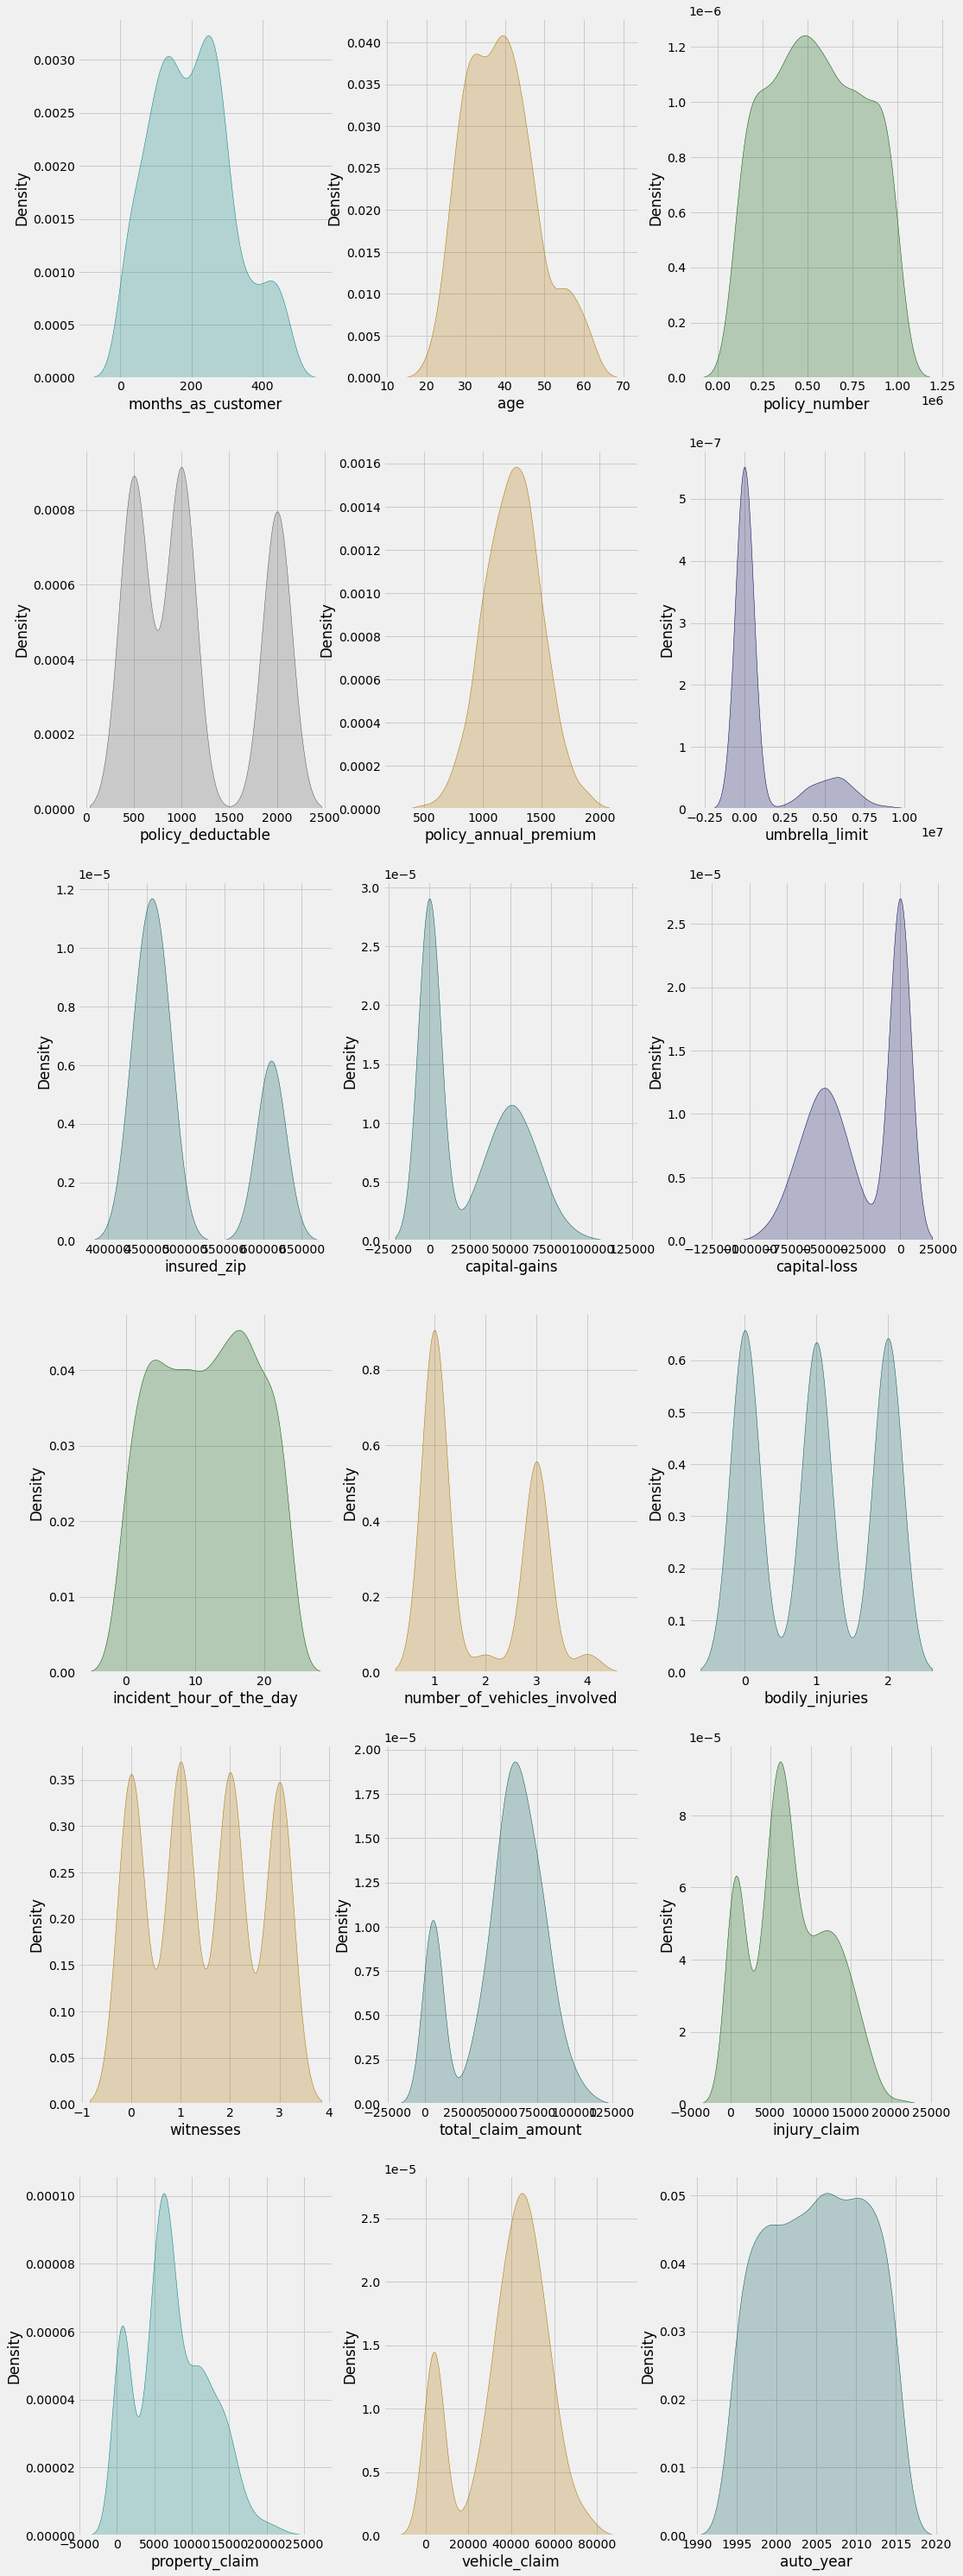

In [126]:
plt.figure(figsize=(16,50))
for i,col in enumerate(df[cont_features].columns):
    rand_col=color_[random.sample(range(6),1)[0]]
    plt.subplot(6,3,i+1)
    sns.kdeplot(data=df,x=col,color=rand_col,fill=rand_col,palette=cmap_[random.sample(range(3),1)[0]])

# Missing Values

In [127]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [128]:
df.isnull().sum()/df.shape[0]*100

months_as_customer              0.0
age                             0.0
policy_number                   0.0
policy_bind_date                0.0
policy_state                    0.0
policy_csl                      0.0
policy_deductable               0.0
policy_annual_premium           0.0
umbrella_limit                  0.0
insured_zip                     0.0
insured_sex                     0.0
insured_education_level         0.0
insured_occupation              0.0
insured_hobbies                 0.0
insured_relationship            0.0
capital-gains                   0.0
capital-loss                    0.0
incident_date                   0.0
incident_type                   0.0
collision_type                 17.8
incident_severity               0.0
authorities_contacted           0.0
incident_state                  0.0
incident_city                   0.0
incident_location               0.0
incident_hour_of_the_day        0.0
number_of_vehicles_involved     0.0
property_damage             

In [129]:
df[['incident_type','collision_type']]

incident_type   collision_type
0    Single Vehicle Collision   Side Collision
1               Vehicle Theft              NaN
2     Multi-vehicle Collision   Rear Collision
3    Single Vehicle Collision  Front Collision
4               Vehicle Theft              NaN
..                        ...              ...
995  Single Vehicle Collision  Front Collision
996  Single Vehicle Collision   Rear Collision
997   Multi-vehicle Collision   Side Collision
998  Single Vehicle Collision   Rear Collision
999                Parked Car              NaN

[1000 rows x 2 columns]

In [130]:
df[df['collision_type'].isnull()][['incident_type','collision_type']]

incident_type collision_type
1    Vehicle Theft            NaN
4    Vehicle Theft            NaN
13      Parked Car            NaN
26      Parked Car            NaN
27   Vehicle Theft            NaN
..             ...            ...
964  Vehicle Theft            NaN
969  Vehicle Theft            NaN
983     Parked Car            NaN
994     Parked Car            NaN
999     Parked Car            NaN

[178 rows x 2 columns]

In [131]:
df[df['collision_type'].isnull()]['incident_type'].unique()

array(['Vehicle Theft', 'Parked Car'], dtype=object)

In [132]:
df[df['incident_type']=='Parked Car']

months_as_customer  age  policy_number policy_bind_date policy_state  \
13                  121   34         626808       26-10-2012           OH   
26                  257   43         863236       20-09-1990           IN   
37                  289   49         933293       03-02-1993           IL   
54                  195   39         282195       17-08-2014           OH   
57                   94   32         307195       18-10-1995           IN   
..                  ...  ...            ...              ...          ...   
942                 108   31         148498       04-01-2002           IN   
950                 101   27         557218       23-11-1997           IL   
983                  17   39         774895       28-10-2006           IL   
994                 141   30         681486       24-03-2007           IN   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
13     100/300               1000                 936.61               0   
26     100/300               2000                1322.10               0   
37    500/1000               2000                1222.48               0   
54     250/500               1000                1393.57               0   
57    500/1000               1000                1414.74               0   
..         ...                ...                    ...             ...   
942    250/500               2000                1112.04         6000000   
950   500/1000                500                 982.70         6000000   
983    250/500               1000                 840.95               0   
994   500/1000               1000                1347.04               0   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
13        464652      FEMALE                      MD       armed-forces   
26        436984        MALE             High School     prof-specialty   
37        620757      FEMALE                      JD    priv-house-serv   
54        478423        MALE                     PhD  machine-op-inspct   
57        464691      FEMALE                 Masters       adm-clerical   
..           ...         ...                     ...                ...   
942       472209      FEMALE                     PhD      other-service   
950       440865      FEMALE                 College   transport-moving   
983       431202      FEMALE                      JD       adm-clerical   
994       430665        MALE             High School              sales   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
13   bungie-jumping                 wife          52800        -32800   
26             golf            own-child              0        -29200   
37             golf            unmarried              0             0   
54           movies        not-in-family          47600        -39600   
57           hiking            own-child              0             0   
..              ...                  ...            ...           ...   
942    base-jumping            own-child          52800        -54300   
950     video-games            unmarried          30800        -43700   
983          hiking            unmarried          32500        -80800   
994  bungie-jumping            own-child              0        -82100   
999        kayaking              husband              0             0   

    incident_date incident_type collision_type incident_severity  \
13     08-01-2015    Parked Car            NaN      Minor Damage   
26     28-01-2015    Parked Car            NaN      Minor Damage   
37     18-01-2015    Parked Car            NaN      Minor Damage   
54     27-02-2015    Parked Car            NaN      Minor Damage   
57     22-02-2015    Parked Car            NaN   

In [133]:
df[df['incident_type']=='Vehicle Theft']

months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868       27-06-2006           IN   
4                   228   44         367455       06-06-2014           IL   
27                  202   34         608513       18-07-2002           IN   
48                  175   34         866931       07-01-2008           IN   
51                   91   27         537546       20-08-1994           IL   
..                  ...  ...            ...              ...          ...   
959                 137   35         645723       05-05-1991           OH   
961                 128   35         437960       03-04-2001           IN   
963                 104   30         544225       03-08-2010           OH   
964                 163   37         390256       25-11-2009           IN   
969                 398   55         844062       25-05-1990           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
1      250/500               2000                1197.22         5000000   
4     500/1000               1000                1583.91         6000000   
27     100/300                500                 848.07         3000000   
48    500/1000               1000                1123.87         8000000   
51     100/300               2000                1073.83               0   
..         ...                ...                    ...             ...   
959   500/1000                500                1107.07               0   
961    250/500               1000                1074.99               0   
963    100/300                500                1052.85               0   
964   500/1000               1000                1200.33         4000000   
969    250/500                500                 862.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
1         468176        MALE                      MD  machine-op-inspct   
4         610706        MALE               Associate              sales   
27        607730        MALE                      JD    exec-managerial   
48        446326      FEMALE                     PhD    protective-serv   
51        609930      FEMALE                      JD    farming-fishing   
..           ...         ...                     ...                ...   
959       478868      FEMALE             High School    protective-serv   
961       453620      FEMALE               Associate       adm-clerical   
963       607697      FEMALE                      MD    protective-serv   
964       477631      FEMALE             High School       craft-repair   
969       606858        MALE             High School       adm-clerical   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
1           reading       other-relative              0             0   
4       board-games            unmarried          66000        -46000   
27            chess        not-in-family          31000        -30200   
48          dancing       other-relative              0             0   
51             polo              husband              0             0   
..              ...                  ...            ...           ...   
959          movies              husband              0        -45300   
961  bungie-jumping              husband              0        -48800   
963       skydiving       other-relative              0        -70100   
964       cross-fit            own-child              0        -36400   
969          movies            unmarried          69400             0   

    incident_date  incident_type collision_type incident_severity  \
1      21-01-2015  Vehicle Theft            NaN      Minor Damage   
4      17-02-2015  Vehicle Theft            NaN      Minor Damage   
27     07-01-2015  Vehicle Theft            NaN      Minor Damage   
48     26-02-2015  Vehicle Theft            NaN    Trivial Damage   
51     17-01-2015  Vehicle Theft            

In [134]:
df[df['property_damage'].isnull()]

months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868       27-06-2006           IN   
3                   256   41         227811       25-05-1990           IL   
6                   137   34         413978       04-06-2000           IN   
7                   165   37         429027       03-02-1990           IL   
16                   70   26         558938       08-06-2005           OH   
..                  ...  ...            ...              ...          ...   
993                 124   28         674570       08-12-2001           OH   
994                 141   30         681486       24-03-2007           IN   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
1      250/500               2000                1197.22         5000000   
3      250/500               2000                1415.74         6000000   
6      250/500               1000                1333.35               0   
7      100/300               1000                1137.03               0   
16    500/1000               1000                1199.44         5000000   
..         ...                ...                    ...             ...   
993    250/500               1000                1235.14               0   
994   500/1000               1000                1347.04               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
1         468176        MALE                      MD  machine-op-inspct   
3         608117      FEMALE                     PhD       armed-forces   
6         441716        MALE                     PhD     prof-specialty   
7         603195        MALE               Associate       tech-support   
16        619884        MALE                 College  machine-op-inspct   
..           ...         ...                     ...                ...   
993       443567        MALE                      MD    exec-managerial   
994       430665        MALE             High School              sales   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
1           reading       other-relative              0             0   
3       board-games            unmarried          48900        -62400   
6       board-games              husband              0        -77000   
7      base-jumping            unmarried              0             0   
16           hiking            own-child          63600             0   
..              ...                  ...            ...           ...   
993         camping              husband              0        -32100   
994  bungie-jumping            own-child              0        -82100   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
1      21-01-2015             Vehicle Theft              NaN   
3      10-01-2015  Single Vehicle Collision  Front Collision   
6      13-01-2015   Multi-vehicle Collision  Front Collision   
7      27-02-2015   Multi-vehicle Collision  Front Collision   
16     22-02-2015   Multi-vehicle Collision   Rear Collision   
..   

In [135]:
df['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [136]:
df[df['police_report_available'].isnull()]

months_as_customer  age  policy_number policy_bind_date policy_state  \
1                   228   42         342868       27-06-2006           IN   
6                   137   34         413978       04-06-2000           IN   
9                   212   42         636550       25-07-2011           IL   
10                  235   42         543610       26-05-2002           OH   
20                  460   62         183430       25-06-2002           IN   
..                  ...  ...            ...              ...          ...   
989                  22   21         550127       04-07-2007           IN   
993                 124   28         674570       08-12-2001           OH   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
1      250/500               2000                1197.22         5000000   
6      250/500               1000                1333.35               0   
9      100/300                500                1315.68               0   
10     100/300                500                1253.12         4000000   
20     250/500               1000                1187.96         4000000   
..         ...                ...                    ...             ...   
989    250/500               1000                1248.05               0   
993    250/500               1000                1235.14               0   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
1         468176        MALE                      MD  machine-op-inspct   
6         441716        MALE                     PhD     prof-specialty   
9         600983        MALE                     PhD    priv-house-serv   
10        462283      FEMALE                 Masters    exec-managerial   
20        618845        MALE                      JD      other-service   
..           ...         ...                     ...                ...   
989       443550      FEMALE             High School    exec-managerial   
993       443567        MALE                      MD    exec-managerial   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
1           reading       other-relative              0             0   
6       board-games              husband              0        -77000   
9           camping                 wife              0        -39300   
10          dancing       other-relative          38400             0   
20   bungie-jumping            own-child              0             0   
..              ...                  ...            ...           ...   
989          movies              husband          37500        -54000   
993         camping              husband              0        -32100   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
1      21-01-2015             Vehicle Theft              NaN   
6      13-01-2015   Multi-vehicle Collision  Front Collision   
9      05-01-2015  Single Vehicle Collision   Rear Collision   
10     06-01-2015  Single Vehicle Collision  Front Collision   
20     01-01-2015   Multi-vehicle Collision   Rear Collision   
..   

In [137]:
Missing_coulmn=[]
for i in df.columns:
    if df[i].isnull().sum() !=0:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [138]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Correlation

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['fraud_reported'])

<AxesSubplot:>

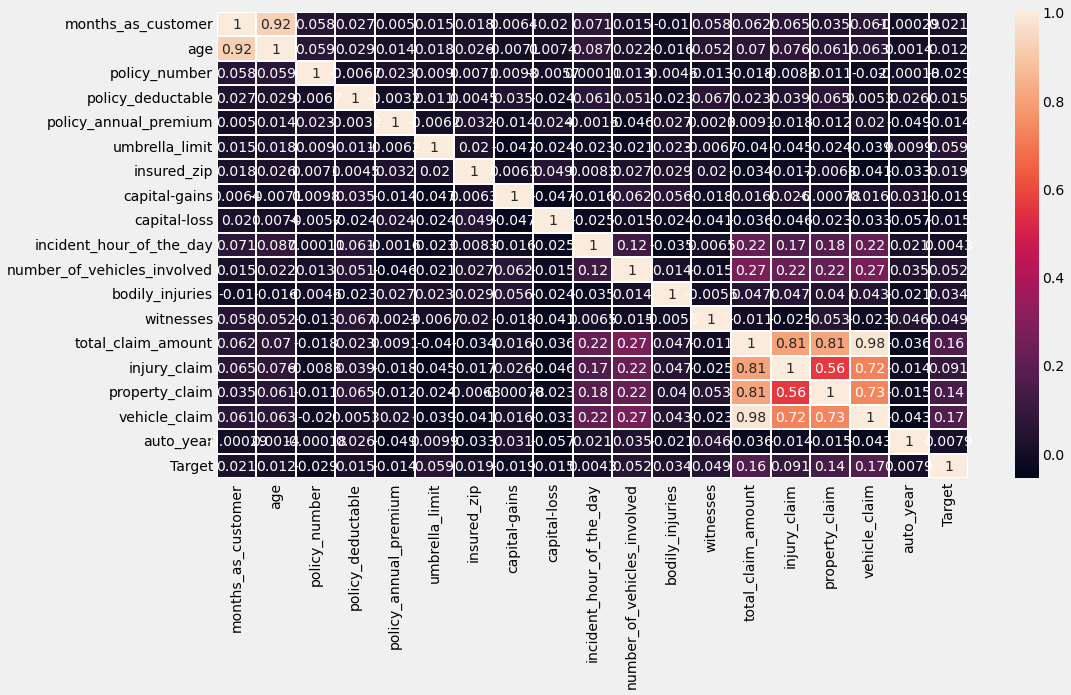

In [140]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=.25)

In [141]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft   Rear Collision      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [142]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [143]:
['policy_number','policy_bind_date','insured_zip','incident_date', 'incident_location']

['policy_number',
 'policy_bind_date',
 'insured_zip',
 'incident_date',
 'incident_location']

<AxesSubplot:xlabel='policy_csl'>

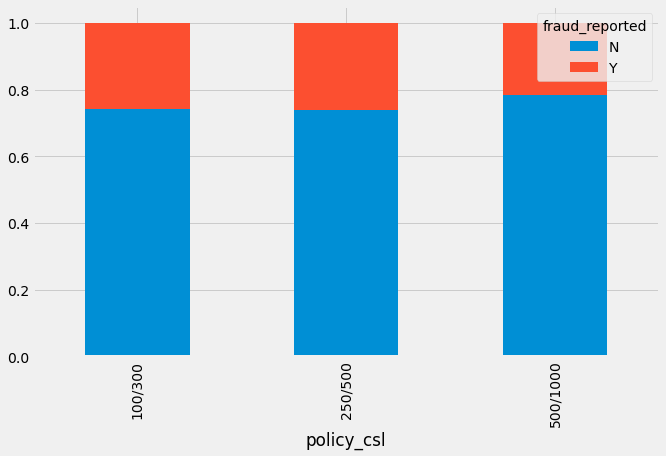

In [144]:
table=pd.crosstab(df['policy_csl'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)

In [145]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [146]:
df['csl_per_person']= df['policy_csl'].str.split('/',expand=True)[0]
df['csl_per_accident']= df['policy_csl'].str.split('/',expand=True)[1]

In [147]:
df['csl_per_person'].head()

0    250
1    250
2    100
3    250
4    500
Name: csl_per_person, dtype: object

In [148]:
df['csl_per_accident'].head()

0     500
1     500
2     300
3     500
4    1000
Name: csl_per_accident, dtype: object

In [149]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft   Rear Collision      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [150]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [151]:
df['Vehicle_Age']= 2015-df['auto_year']
df['Vehicle_Age']

0      11
1       8
2       8
3       1
4       6
       ..
995     9
996     0
997    19
998    17
999     8
Name: Vehicle_Age, Length: 1000, dtype: int64

In [152]:
df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [153]:
['policy_number','policy_bind_date','insured_zip','incident_date', 'incident_location','policy_csl']

['policy_number',
 'policy_bind_date',
 'insured_zip',
 'incident_date',
 'incident_location',
 'policy_csl']

In [154]:
# dropping unimportant columns

df = df.drop(columns = ['policy_number', 'policy_csl','insured_zip','policy_bind_date', 'incident_date', 'incident_location',
                        'auto_year'])

df.head(2)

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   

   capital-loss             incident_type  collision_type incident_severity  \
0             0  Single Vehicle Collision  Side Collision      Major Damage   
1             0             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

  fraud_reported  Target csl_per_person csl_per_accident  Vehicle_Age  
0              Y       1            250              500           11  
1              Y       1            250              500            8

In [155]:
# Target Variable:

df[['fraud_reported','Target']]
    

fraud_reported  Target
0                Y       1
1                Y       1
2                N       0
3                Y       1
4                N       0
..             ...     ...
995              N       0
996              N       0
997              N       0
998              N       0
999              N       0

[1000 rows x 2 columns]

In [157]:
df['incident_hour_of_the_day']


0       5
1       8
2       7
3       5
4      20
       ..
995    20
996    23
997     4
998     2
999     6
Name: incident_hour_of_the_day, Length: 1000, dtype: int64

In [158]:
# This should be trated like categorical column

df['incident_hour_of_the_day'].unique()

array([ 5,  8,  7, 20, 19,  0, 23, 21, 14, 22,  9, 12, 15,  6, 16,  4, 10,
        1, 17,  3, 11, 13, 18,  2], dtype=int64)

In [159]:
bins=[-1,5,11,16,20,24]
name=['night','Morning','afternoon','evening','midnight']
df['incident_period_of_the_day']= pd.cut(df['incident_hour_of_the_day'],bins,labels=name)

In [160]:
df[['incident_hour_of_the_day','incident_period_of_the_day']]

incident_hour_of_the_day incident_period_of_the_day
0                           5                      night
1                           8                    Morning
2                           7                    Morning
3                           5                      night
4                          20                    evening
..                        ...                        ...
995                        20                    evening
996                        23                   midnight
997                         4                      night
998                         2                      night
999                         6                    Morning

[1000 rows x 2 columns]

In [161]:
df.head(2)

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   

   capital-loss             incident_type  collision_type incident_severity  \
0             0  Single Vehicle Collision  Side Collision      Major Damage   
1             0             Vehicle Theft  Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   

   injury_claim  property_claim  vehicle_claim auto_make auto_model  \
0          6510           13020          52080      Saab        92x   
1           780             780           3510  Mercedes       E400   

  fraud_reported  Target csl_per_person csl_per_accident  Vehicle_Age  \
0              Y       1            250              500           11   
1              Y       1            250              500            8   

  incident_period_of_the_day  
0                      night  
1                    Morning

In [162]:
df=df.drop('incident_hour_of_the_day',axis=1)

In [163]:
df

months_as_customer  age policy_state  policy_deductable  \
0                   328   48           OH               1000   
1                   228   42           IN               2000   
2                   134   29           OH               2000   
3                   256   41           IL               2000   
4                   228   44           IL               1000   
..                  ...  ...          ...                ...   
995                   3   38           OH               1000   
996                 285   41           IL               1000   
997                 130   34           OH                500   
998                 458   62           IL               2000   
999                 456   60           OH               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91               0        MALE   
1                  1197.22         5000000        MALE   
2                  1413.14         5000000      FEMALE   
3                  1415.74         6000000      FEMALE   
4                  1583.91         6000000        MALE   
..                     ...             ...         ...   
995                1310.80               0      FEMALE   
996                1436.79               0      FEMALE   
997                1383.49         3000000      FEMALE   
998                1356.92         5000000        MALE   
999                 766.19               0      FEMALE   

    insured_education_level insured_occupation insured_hobbies  \
0                        MD       craft-repair        sleeping   
1                        MD  machine-op-inspct         reading   
2                       PhD              sales     board-games   
3                       PhD       armed-forces     board-games   
4                 Associate              sales     board-games   
..                      ...                ...             ...   
995                 Masters       craft-repair       paintball   
996                     PhD     prof-specialty        sleeping   
997                 Masters       armed-forces  bungie-jumping   
998               Associate  handlers-cleaners    base-jumping   
999               Associate              sales        kayaking   

    insured_relationship  capital-gains  capital-loss  \
0                husband          53300             0   
1         other-relative              0             0   
2              own-child          35100             0   
3              unmarried          48900        -62400   
4              unmarried          66000        -46000   
..                   ...            ...           ...   
995            unmarried              0             0   
996                 wife          70900             0   
997       other-relative          35100             0   
998                 wife              0             0   
999              husband              0             0   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft   Rear Collision      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft   Rear Collision      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car   Rear Collision      Minor Damage   

    authorities_contacted incident_state incident_city  \
0                  Police             SC      Columbus   
1                  Police             VA     Riverwood   
2                  Police             NY      Columbus   
3           

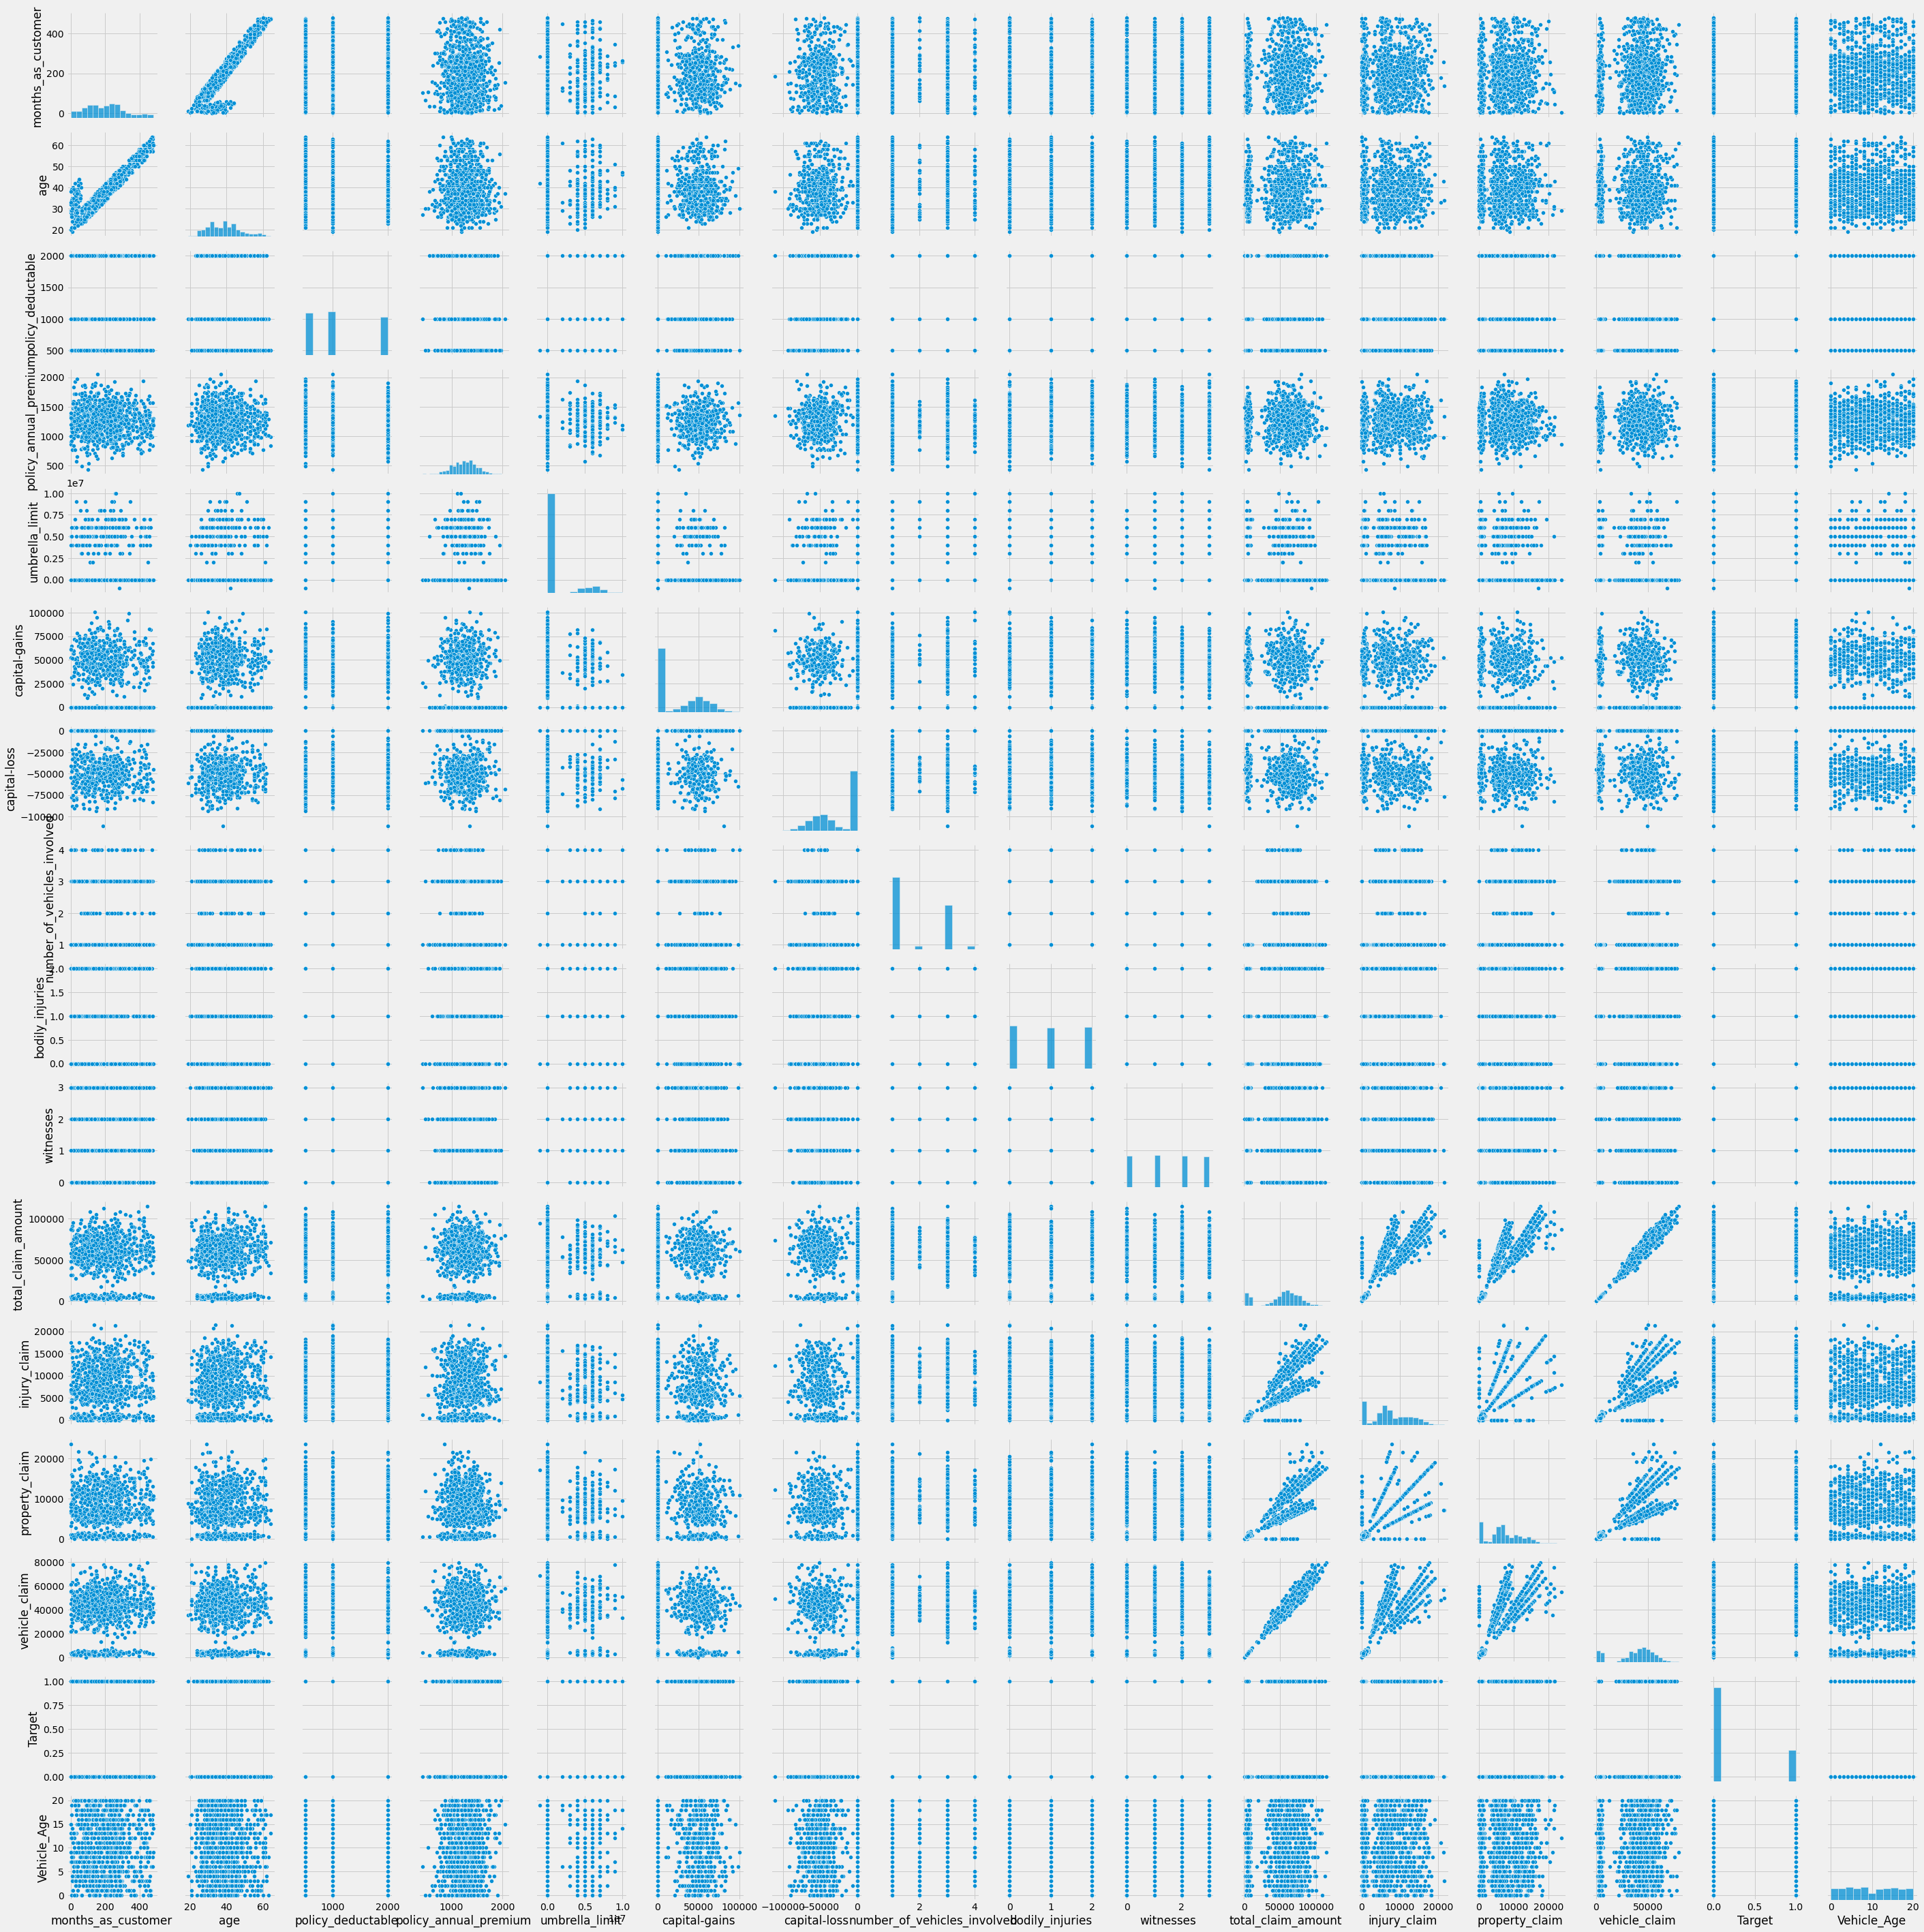

In [164]:
sns.pairplot(df)

In [165]:
df['incident_period_of_the_day']=df['incident_period_of_the_day'].astype(object)
df['umbrella_limit']=df['umbrella_limit'].astype(object)

# Seprate Independent and Independent Variables

In [166]:
X=df.drop('Target',axis=1)
Y=df['Target']

In [167]:
X.shape,Y.shape

((1000, 35), (1000,))

In [168]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [169]:
catg_features

['policy_state',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'csl_per_person',
 'csl_per_accident',
 'incident_period_of_the_day']

In [170]:
cont_features

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'capital-gains',
 'capital-loss',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'Vehicle_Age']

In [171]:
len(catg_features) + len(cont_features)

35

# Continuous Fetaures

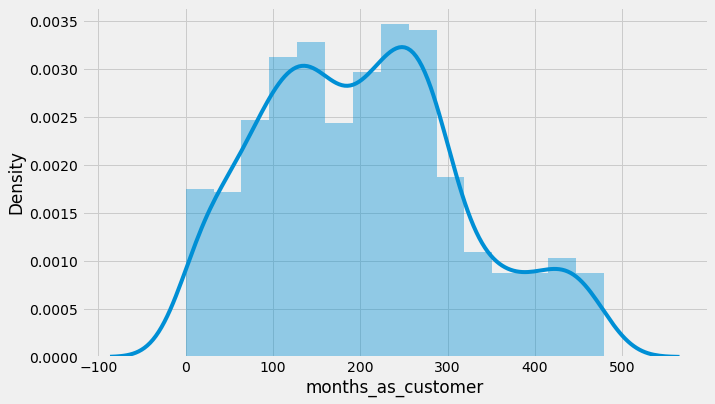

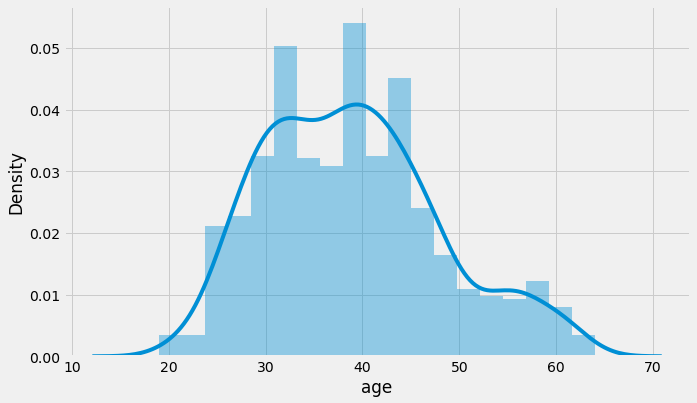

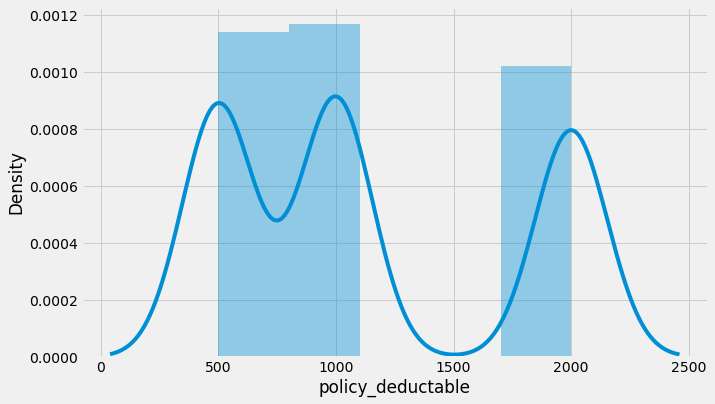

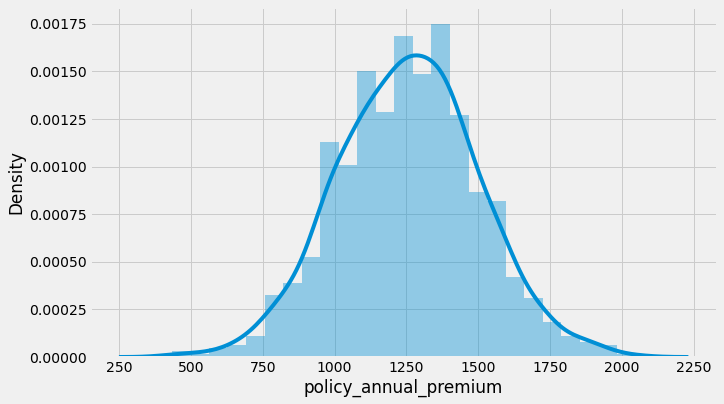

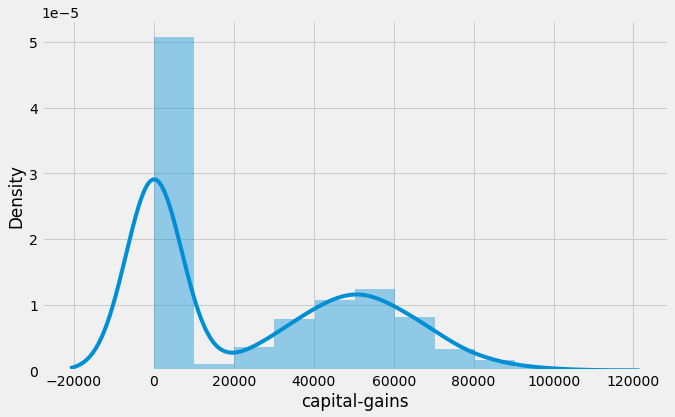

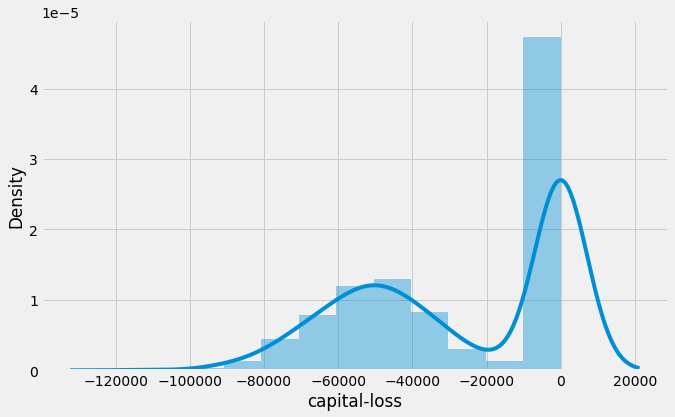

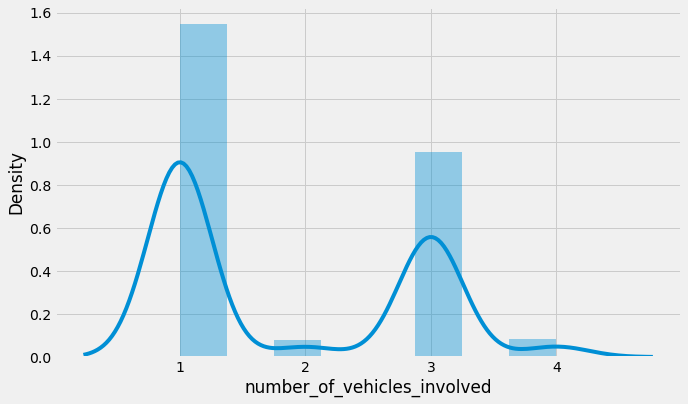

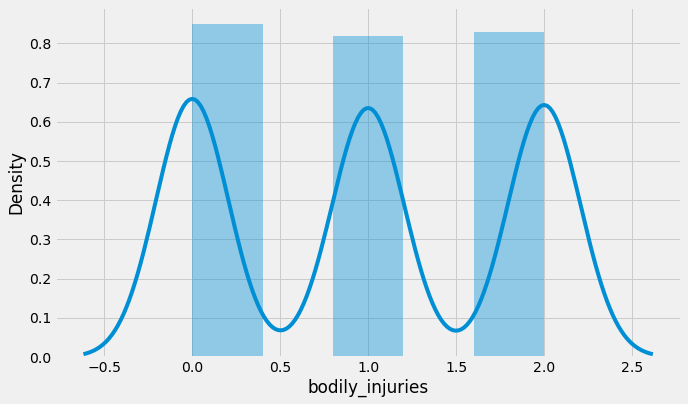

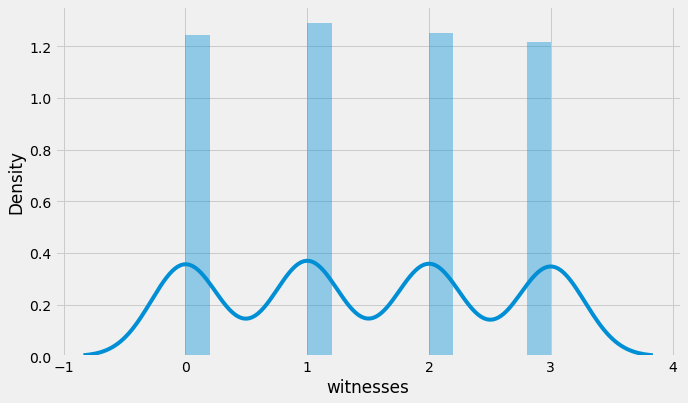

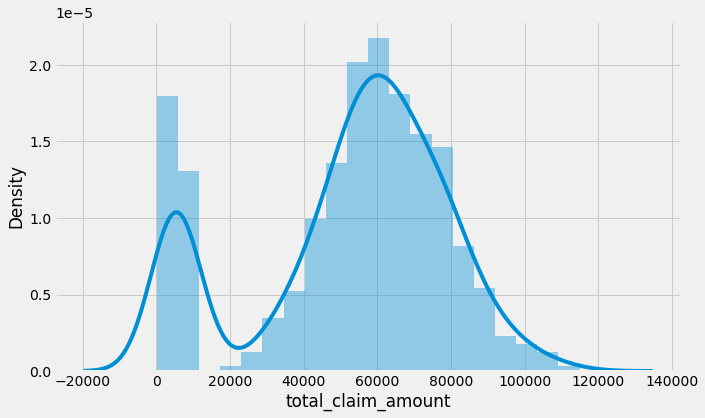

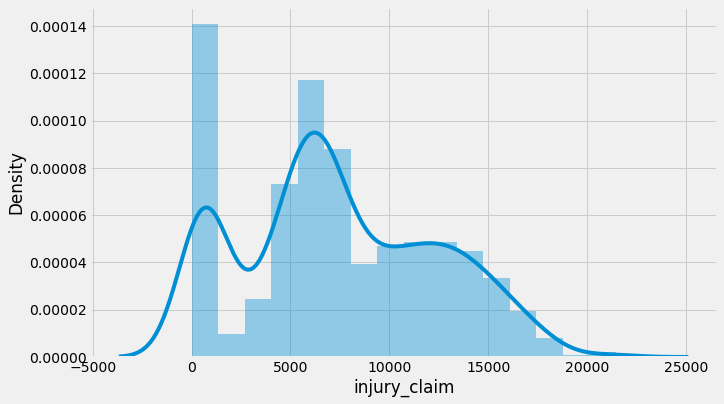

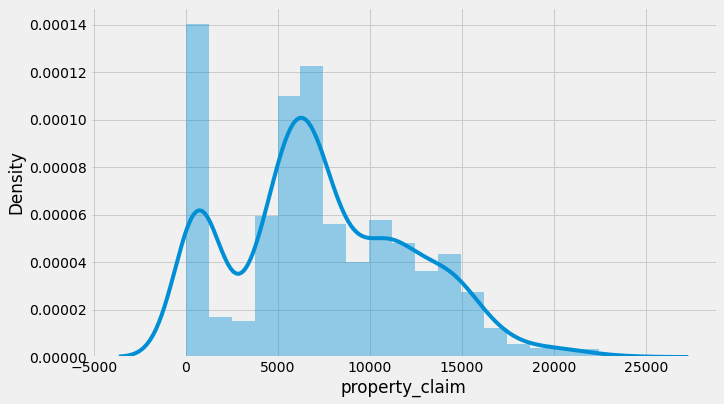

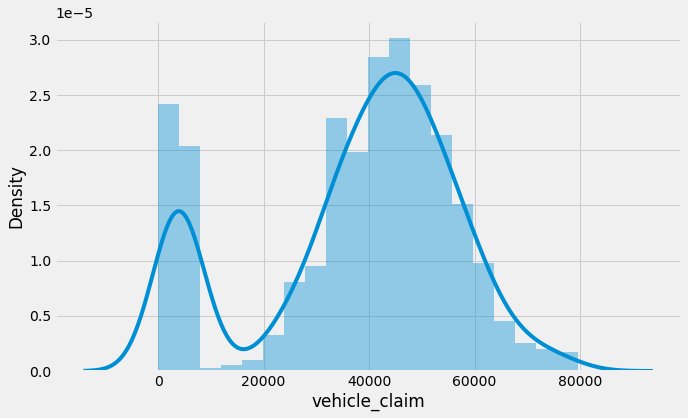

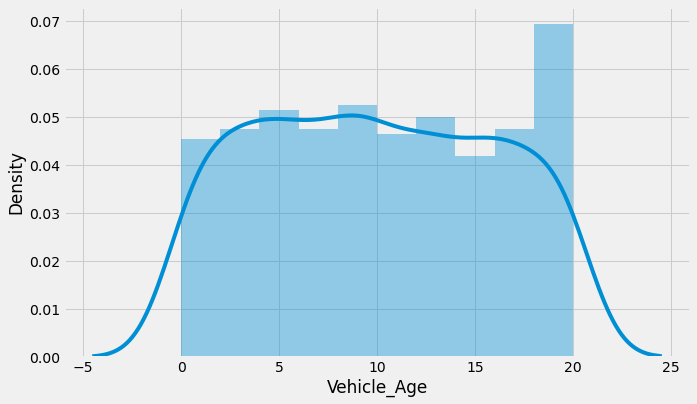

In [172]:
for i in cont_features:
    sns.distplot(X[i])
    plt.show()

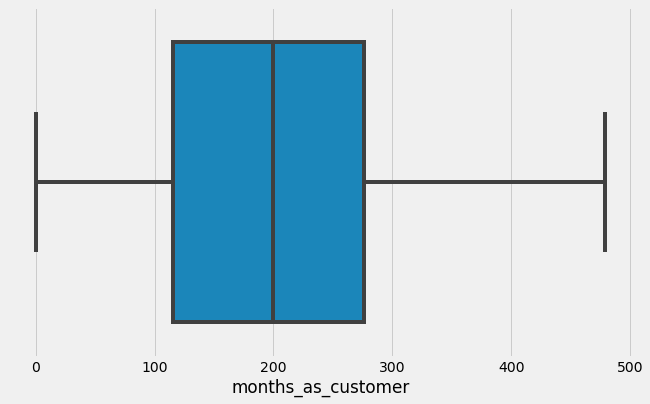

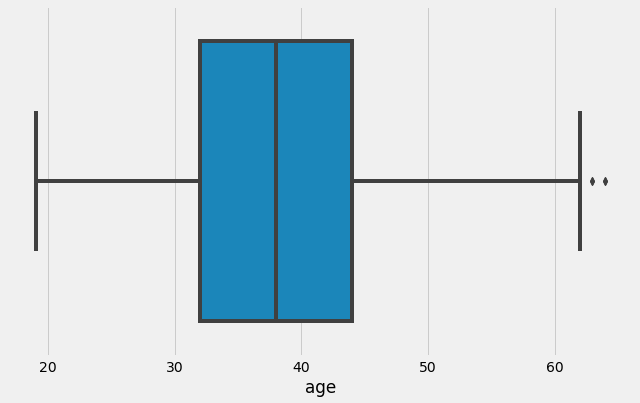

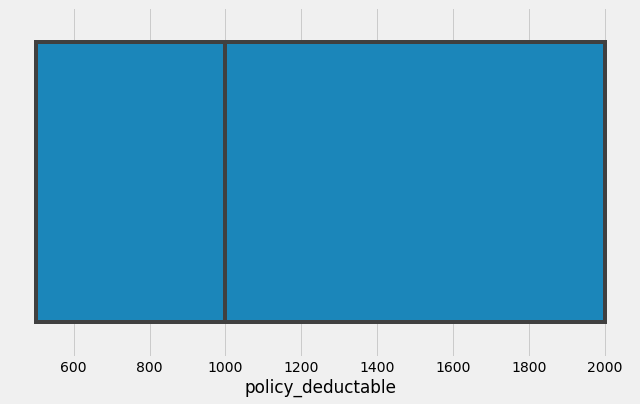

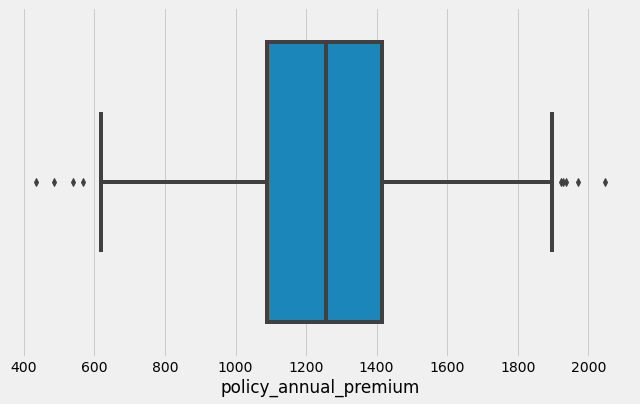

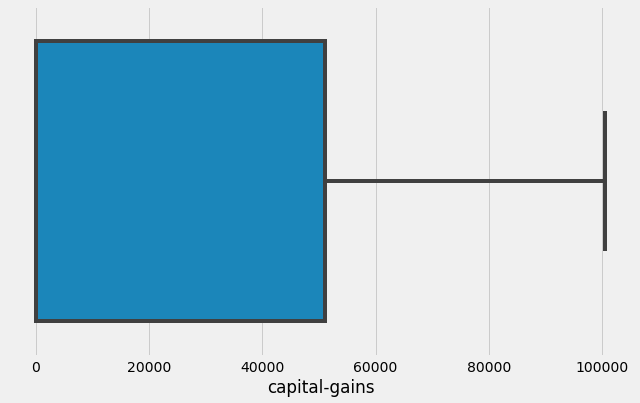

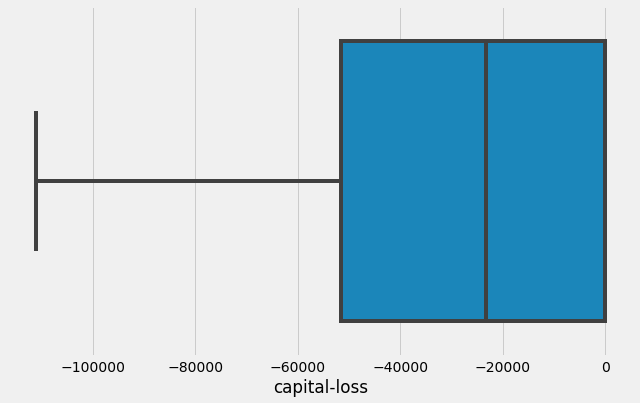

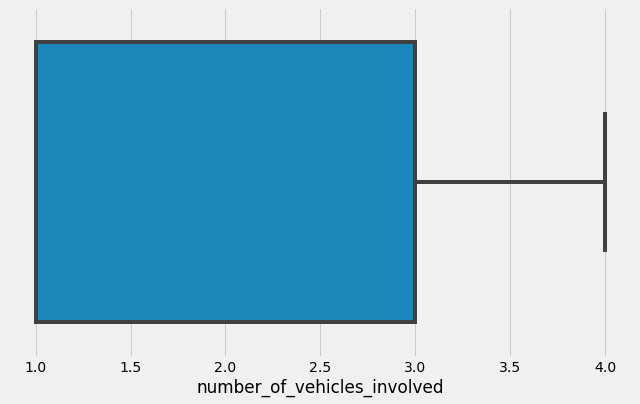

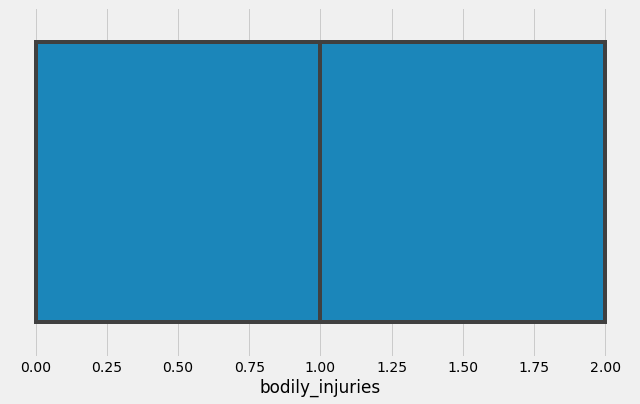

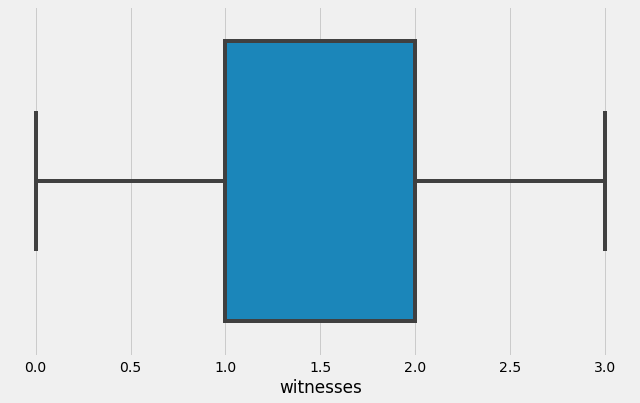

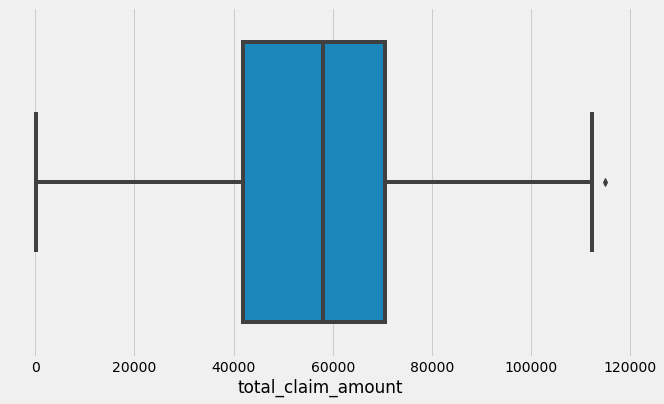

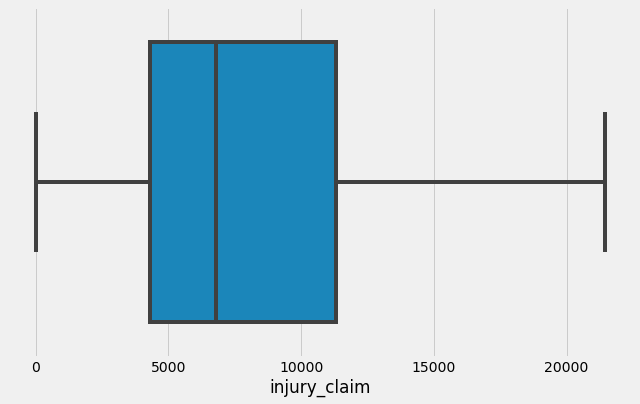

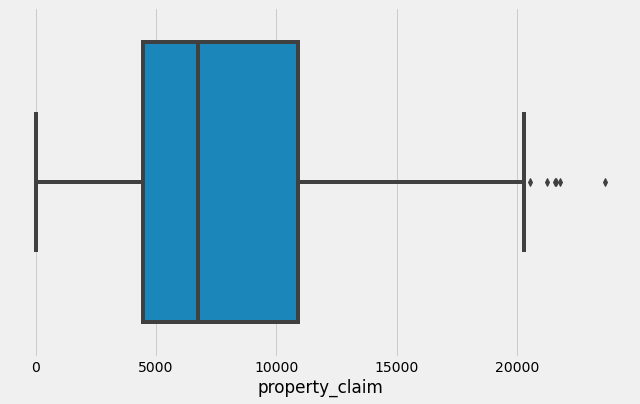

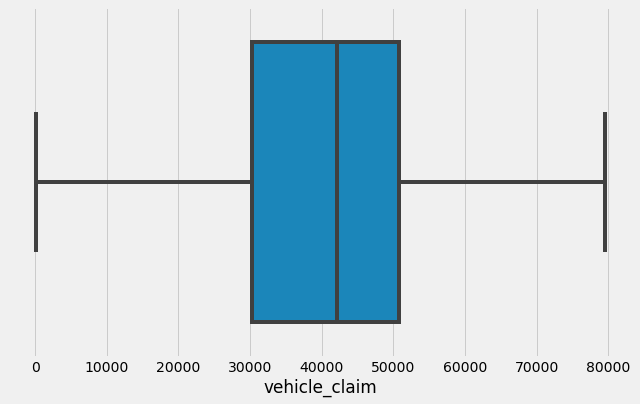

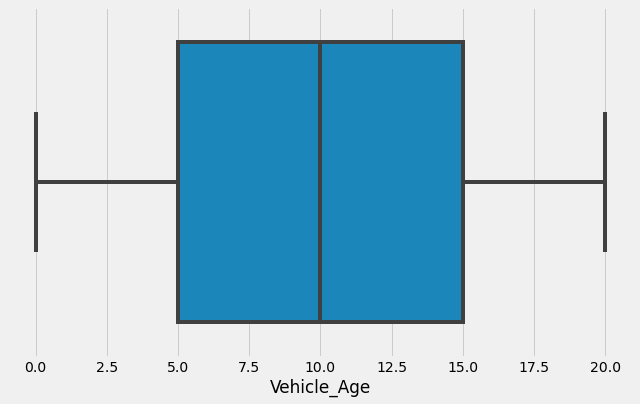

In [173]:
for i in cont_features:
    sns.boxplot(X[i])
    plt.show()

# Multicolinearity
Feature Selection
VIF


In [174]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(X[cont_features])


In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
VIF= pd.DataFrame()
VIF['features']=X[cont_features].columns

In [177]:
VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(cont_features))]


In [178]:
VIF

features       vif
0            months_as_customer  6.768840
1                           age  6.769188
2             policy_deductable  1.019122
3         policy_annual_premium  1.010819
4                 capital-gains  1.013279
5                  capital-loss  1.012022
6   number_of_vehicles_involved  1.092591
7               bodily_injuries  1.008507
8                     witnesses  1.023129
9            total_claim_amount       inf
10                 injury_claim       inf
11               property_claim       inf
12                vehicle_claim       inf
13                  Vehicle_Age  1.013529

In [180]:
# However Total claim is the total of injury_claim + property_claim + vehicle_claim
# Delete total_claim_amount

In [179]:
X.drop('total_claim_amount',axis=1,inplace=True)

In [181]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [182]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(X[cont_features])

VIF= pd.DataFrame()
VIF['features']=X[cont_features].columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(cont_features))]
VIF

features       vif
0            months_as_customer  6.768840
1                           age  6.769188
2             policy_deductable  1.019122
3         policy_annual_premium  1.010819
4                 capital-gains  1.013279
5                  capital-loss  1.012022
6   number_of_vehicles_involved  1.092591
7               bodily_injuries  1.008507
8                     witnesses  1.023129
9                  injury_claim  2.127564
10               property_claim  2.229648
11                vehicle_claim  3.207667
12                  Vehicle_Age  1.013529

In [183]:
X.drop('age',axis=1,inplace=True)

In [184]:
catg_features=[col for col in X.columns if X[col].dtypes=='object']
cont_features=[col for col in X.columns if X[col].dtypes!='object']

In [185]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(X[cont_features])

VIF= pd.DataFrame()
VIF['features']=X[cont_features].columns

VIF['vif']= [variance_inflation_factor(scaled,i) for i in range(len(cont_features))]

In [186]:
VIF

features       vif
0            months_as_customer  1.010344
1             policy_deductable  1.019118
2         policy_annual_premium  1.009791
3                 capital-gains  1.012092
4                  capital-loss  1.011062
5   number_of_vehicles_involved  1.092275
6               bodily_injuries  1.008158
7                     witnesses  1.022920
8                  injury_claim  2.125120
9                property_claim  2.211840
10                vehicle_claim  3.192699
11                  Vehicle_Age  1.013525

In [187]:
X[cont_features].skew()

months_as_customer             0.362177
policy_deductable              0.477887
policy_annual_premium          0.004402
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Vehicle_Age                    0.048289
dtype: float64

In [188]:
X.head()

months_as_customer policy_state  policy_deductable  policy_annual_premium  \
0                 328           OH               1000                1406.91   
1                 228           IN               2000                1197.22   
2                 134           OH               2000                1413.14   
3                 256           IL               2000                1415.74   
4                 228           IL               1000                1583.91   

  umbrella_limit insured_sex insured_education_level insured_occupation  \
0              0        MALE                      MD       craft-repair   
1        5000000        MALE                      MD  machine-op-inspct   
2        5000000      FEMALE                     PhD              sales   
3        6000000      FEMALE                     PhD       armed-forces   
4        6000000        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1              NO                0          0   
2                            3              NO                2          3   
3                            1              NO                1          2   
4                            1              NO                0          1   

  police_report_available  injury_claim  property_claim  vehicle_claim  \
0                     YES          6510           13020          52080   
1                      NO           780             780           3510   
2                      NO          7700            3850          23100   
3                      NO          6340            6340          50720   
4                      NO          1300             650           4550   

   auto_make auto_model fraud_reported csl_per_person csl_per_accident  \
0       Saab        92x              Y            250              500   
1   Mercedes       E400              Y            250              500   
2      Dodge        RAM              N            100              300   
3  Chevrolet      Tahoe              Y            250              500   
4     Accura        RSX              N            500             1000   

   Vehicle_Age incident_period_of_the_day  
0           11                      night  
1            8                    Morning  
2            8                    Morning  
3            1                      night  
4            6                    evening

In [189]:
X.shape

(1000, 33)

# Transformation and Standardization

In [190]:
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

In [191]:
for i in cont_features:
    pow=power_transform(X[cont_features])
    X[i]=sc.fit_transform(pow)

In [192]:
x

0.6

# Encoding


In [193]:
X[catg_features]


policy_state umbrella_limit insured_sex insured_education_level  \
0             OH              0        MALE                      MD   
1             IN        5000000        MALE                      MD   
2             OH        5000000      FEMALE                     PhD   
3             IL        6000000      FEMALE                     PhD   
4             IL        6000000        MALE               Associate   
..           ...            ...         ...                     ...   
995           OH              0      FEMALE                 Masters   
996           IL              0      FEMALE                     PhD   
997           OH        3000000      FEMALE                 Masters   
998           IL        5000000        MALE               Associate   
999           OH              0      FEMALE               Associate   

    insured_occupation insured_hobbies insured_relationship  \
0         craft-repair        sleeping              husband   
1    machine-op-inspct         reading       other-relative   
2                sales     board-games            own-child   
3         armed-forces     board-games            unmarried   
4                sales     board-games            unmarried   
..                 ...             ...                  ...   
995       craft-repair       paintball            unmarried   
996     prof-specialty        sleeping                 wife   
997       armed-forces  bungie-jumping       other-relative   
998  handlers-cleaners    base-jumping                 wife   
999              sales        kayaking              husband   

                incident_type   collision_type incident_severity  \
0    Single Vehicle Collision   Side Collision      Major Damage   
1               Vehicle Theft   Rear Collision      Minor Damage   
2     Multi-vehicle Collision   Rear Collision      Minor Damage   
3    Single Vehicle Collision  Front Collision      Major Damage   
4               Vehicle Theft   Rear Collision      Minor Damage   
..                        ...              ...               ...   
995  Single Vehicle Collision  Front Collision      Minor Damage   
996  Single Vehicle Collision   Rear Collision      Major Damage   
997   Multi-vehicle Collision   Side Collision      Minor Damage   
998  Single Vehicle Collision   Rear Collision      Major Damage   
999                Parked Car   Rear Collision      Minor Damage   

    authorities_contacted incident_state incident_city property_damage  \
0                  Police             SC      Columbus             YES   
1                  Police             VA     Riverwood              NO   
2                  Police             NY      Columbus              NO   
3                  Police             OH     Arlington              NO   
4                    None             NY     Arlington              NO   
..                    ...            ...           ...             ...   
995                  Fire             NC    Northbrook             YES   
996                  Fire             SC     Northbend             YES   
997                Police             NC     Arlington              NO   
998                 Other             NY     Arlington              NO   
999                Police             WV      Columbus              NO   

    police_report_available   auto_make auto_model fraud_reported  \
0                       YES        Saab        92x              Y   
1                        NO    Mercedes       E400              Y   
2                        NO       Dodge        RAM              N   
3                        NO   Chevrolet      Tahoe              Y   
4                        NO      Accura        RSX              N   
..                      ...         ...        ...            ...   
995                      NO       Honda     Accord              N   
996                      NO  Volkswagen     Passat              N   
997                     YES      Suburu    Impreza              N  

In [195]:
ordinal=['umbrella_limit','insured_education_level','insured_occupation']

In [196]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in ordinal:
    X[i]=le.fit_transform(X[i])

In [197]:
X.head()

months_as_customer policy_state  policy_deductable  policy_annual_premium  \
0            1.051279           OH           1.060250               1.060250   
1            0.304536           IN           0.275268               0.275268   
2           -0.511226           OH          -0.535246              -0.535246   
3            0.523344           IL           0.501720               0.501720   
4            0.304536           IL           0.275268               0.275268   

   umbrella_limit insured_sex  insured_education_level  insured_occupation  \
0               1        MALE                        4                   2   
1               5        MALE                        4                   6   
2               5      FEMALE                        6                  11   
3               6      FEMALE                        6                   1   
4               6        MALE                        0                  11   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband       1.060250      1.060250   
1         reading       other-relative       0.275268      0.275268   
2     board-games            own-child      -0.535246     -0.535246   
3     board-games            unmarried       0.501720      0.501720   
4     board-games            unmarried       0.275268      0.275268   

              incident_type   collision_type incident_severity  \
0  Single Vehicle Collision   Side Collision      Major Damage   
1             Vehicle Theft   Rear Collision      Minor Damage   
2   Multi-vehicle Collision   Rear Collision      Minor Damage   
3  Single Vehicle Collision  Front Collision      Major Damage   
4             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                  None             NY     Arlington   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                     1.060250             YES         1.060250   1.060250   
1                     0.275268              NO         0.275268   0.275268   
2                    -0.535246              NO        -0.535246  -0.535246   
3                     0.501720              NO         0.501720   0.501720   
4                     0.275268              NO         0.275268   0.275268   

  police_report_available  injury_claim  property_claim  vehicle_claim  \
0                     YES      1.060250        1.060250       1.060250   
1                      NO      0.275268        0.275268       0.275268   
2                      NO     -0.535246       -0.535246      -0.535246   
3                      NO      0.501720        0.501720       0.501720   
4                      NO      0.275268        0.275268       0.275268   

   auto_make auto_model fraud_reported csl_per_person csl_per_accident  \
0       Saab        92x              Y            250              500   
1   Mercedes       E400              Y            250              500   
2      Dodge        RAM              N            100              300   
3  Chevrolet      Tahoe              Y            250              500   
4     Accura        RSX              N            500             1000   

   Vehicle_Age incident_period_of_the_day  
0     1.060250                      night  
1     0.275268                    Morning  
2    -0.535246                    Morning  
3     0.501720                      night  
4     0.275268                    evening

# Remaining catrgorical are Nominal, Lets encode them


In [198]:
X=pd.get_dummies(X,drop_first=True)


In [199]:
X.shape,Y.shape

((1000, 128), (1000,))

# Balancing Data: SMOTE / Over Sampling

In [200]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(X,Y)

In [201]:
x.shape , y.shape

((1506, 128), (1506,))

In [202]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: Target, dtype: object

# Macine Learning


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [204]:
# FInd best Random_state

maxaccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=.30)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxRS=i
print("Best accuracy is ",maxaccu,"on Random State =",maxRS)

Best accuracy is  1.0 on Random State = 0


In [205]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=8,test_size=.3)

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [210]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
SGH_model= SGDClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,SGH_model,Bag_model,ADA_model,GB_model] 

In [211]:
accuracy=[]
f1=[]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    #print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    #print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    #print(classification_report(y_test,pred))
    #print('*'*50)

Confusion Matrix of  LogisticRegression()  is 
 [[249   0]
 [  0 203]]
Confusion Matrix of  RidgeClassifier()  is 
 [[249   0]
 [  0 203]]
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[249   0]
 [  0 203]]
Confusion Matrix of  SVC()  is 
 [[249   0]
 [  0 203]]
Confusion Matrix of  KNeighborsClassifier()  is 
 [[ 45 204]
 [  2 201]]
Confusion Matrix of  RandomForestClassifier()  is 
 [[249   0]
 [  1 202]]
Confusion Matrix of  SGDClassifier()  is 
 [[248   1]
 [  0 203]]
Confusion Matrix of  BaggingClassifier()  is 
 [[249   0]
 [  0 203]]
Confusion Matrix of  AdaBoostClassifier()  is 
 [[249   0]
 [  0 203]]
Confusion Matrix of  GradientBoostingClassifier()  is 
 [[249   0]
 [  0 203]]


In [212]:
pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

Model  Accuracy  F1 Score
0                               LogisticRegression()    100.00    100.00
1                                  RidgeClassifier()    100.00    100.00
2                           DecisionTreeClassifier()    100.00    100.00
3                                              SVC()    100.00    100.00
4                             KNeighborsClassifier()     54.42     66.12
5  (DecisionTreeClassifier(max_features='auto', r...     99.78     99.75
6                                    SGDClassifier()     99.78     99.75
7  (DecisionTreeClassifier(random_state=236345876...    100.00    100.00
8  (DecisionTreeClassifier(max_depth=1, random_st...    100.00    100.00
9  ([DecisionTreeRegressor(criterion='friedman_ms...    100.00    100.00

# Cross Validation

In [213]:
from sklearn.model_selection import cross_val_score

In [214]:
acc=[]
cross=[]
diff=[]
for i in model:
    acc.append(accuracy_score(y_test,i.predict(x_test))*100)
    cross.append(cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    diff.append((accuracy_score(y_test,i.predict(x_test))*100)- (cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100))
    
pd.DataFrame({'Model':model,'Accuracy':acc,'Cross Validation':cross,'Difference':diff})

Model    Accuracy  \
0                               LogisticRegression()  100.000000   
1                                  RidgeClassifier()  100.000000   
2                           DecisionTreeClassifier()  100.000000   
3                                              SVC()  100.000000   
4                             KNeighborsClassifier()   54.424779   
5  (DecisionTreeClassifier(max_features='auto', r...   99.778761   
6                                    SGDClassifier()   99.778761   
7  (DecisionTreeClassifier(random_state=236345876...  100.000000   
8  (DecisionTreeClassifier(max_depth=1, random_st...  100.000000   
9  ([DecisionTreeRegressor(criterion='friedman_ms...  100.000000   

   Cross Validation  Difference  
0        100.000000    0.000000  
1        100.000000    0.000000  
2        100.000000    0.000000  
3         99.867550    0.132450  
4         59.364370   -4.939592  
5         99.535984   -0.221239  
6         99.933775   -0.221239  
7        100.000000    0.000000  
8        100.000000    0.000000  
9        100.000000    0.000000

In [215]:
accuracy=[]
f1=[]
cross=[]

for m in model:
    m.fit(x_train,y_train)
    
    pred= m.predict(x_test)
  
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    cross.append(cross_val_score(i,x,y,cv=5, scoring='f1').mean()*100)
    
pd.DataFrame({'Model':model,'F1':f1,'Cross Validation':cross})

Model      F1  Cross Validation
0                               LogisticRegression()  100.00             100.0
1                                  RidgeClassifier()  100.00             100.0
2                           DecisionTreeClassifier()  100.00             100.0
3                                              SVC()  100.00             100.0
4                             KNeighborsClassifier()   66.12             100.0
5  (DecisionTreeClassifier(max_features='auto', r...   99.75             100.0
6                                    SGDClassifier()  100.00             100.0
7  (DecisionTreeClassifier(random_state=168375810...  100.00             100.0
8  (DecisionTreeClassifier(max_depth=1, random_st...  100.00             100.0
9  ([DecisionTreeRegressor(criterion='friedman_ms...  100.00             100.0

# GradientBoostingClassifier() Hypertuning


In [221]:
from sklearn.model_selection import GridSearchCV

In [230]:
params= {"learning_rate"    : [0.01,.05,.1,.2,.3,.5 ] ,
         'n_estimators':[5,50,100,200,300,400],
         "max_depth"        : [ 3, 4, 5, 6, 8]
          }

In [231]:
GCV= GridSearchCV(GB_model,params,cv=5,scoring='accuracy', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 8],
                         'n_estimators': [5, 50, 100, 200, 300, 400]},
             scoring='accuracy')

In [232]:
GCV.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=5)

In [225]:
pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,pred)


1.0

# COnfusion Matrix

<AxesSubplot:>

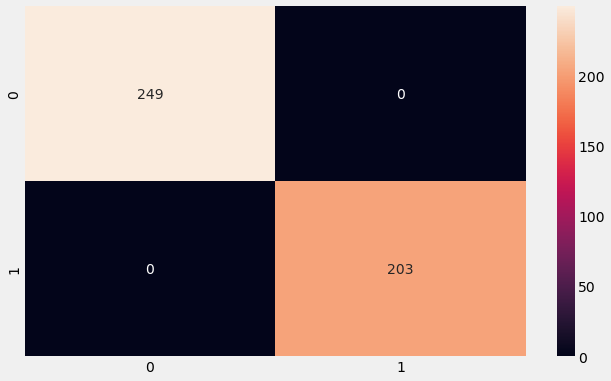

In [216]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)
sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')

# AUC ROC plot

In [219]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

Text(0.5, 1.0, 'ROC AUC Plot')

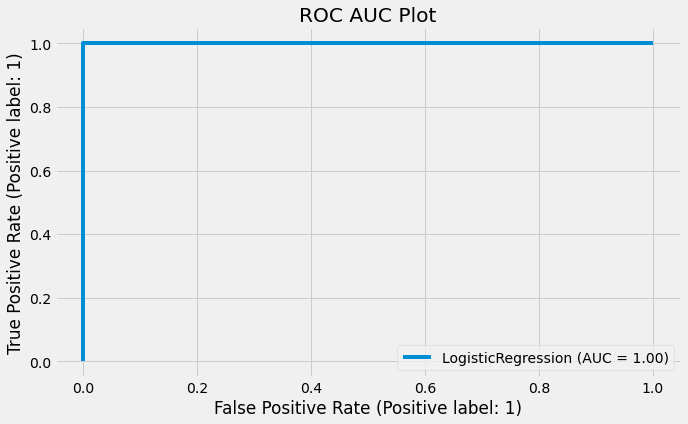

In [234]:
plot_roc_curve(LR_model,x_test,y_test)
plt.title('ROC AUC Plot')

# Saving the Model


In [235]:
import joblib
joblib.dump(GB_model,"Insurance-claim-fraud.pkl")


['Insurance-claim-fraud.pkl']